#  First atomic tritium beam explorations with 2D Boltzmann solver

This notebook makes all the plots shown by BJPJ at the Project8 collaboration meeting in Nov2022

In [66]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import pylab as plt
import copy
import os

from random import choices, getrandbits
from Grids import *
import BoltzEvolve
#import BoltzmannEvolver

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
T=10         # in K
kT=T*8.62e-5 # in eV
mp=3e9        # in eV

ThermMom=np.sqrt(2*mp*kT) # in eV
ThermVel=ThermMom/mp      # in c

ThermVelNormUnits=ThermVel*3e8 # in ms^-1
Density=1e19/(215*1e-4)*(0.27/2)        # in m^-3 (lifted from CDR)
CrossSec=4*np.pi*0.7e-10**2    # in m2


RateConst=ThermVelNormUnits*Density*CrossSec

6.263806122772073e+19


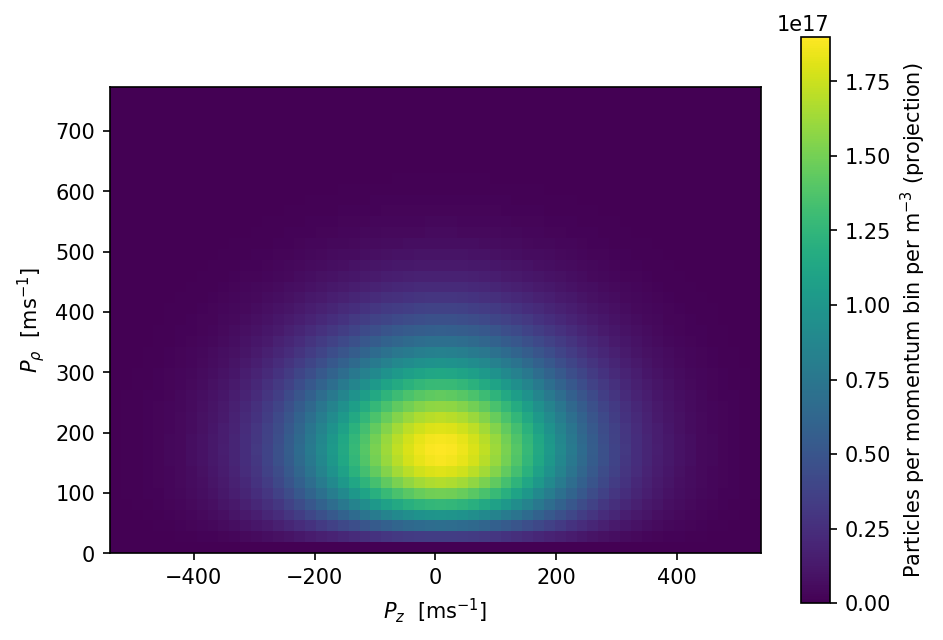

In [68]:
#Plot the MB distribtuion a few ways

dist=SlicedMB2D(T=10, MBPeak=80, gridpoints=30, m=mp, RCut=35,Rho=Density)
plt.figure(figsize=(7,5),dpi=150)
plt.imshow((dist.f*dist.grid.RR2).T,origin='lower',extent=(-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI(),0,dist.grid.rlim*dist.VScale_SI()))
plt.colorbar(label=r'Particles per momentum bin per m$^{-3}$ (projection)')

plt.ylabel(r"$P_\rho$  [ms$^{-1}$]")
plt.xlabel(r"$P_z$  [ms$^{-1}$]")
Tot=sum(sum(dist.f*dist.grid.RR2))
print(Tot)

Text(0.5, 0, '$P_z$  [ms$^{-1}$]')

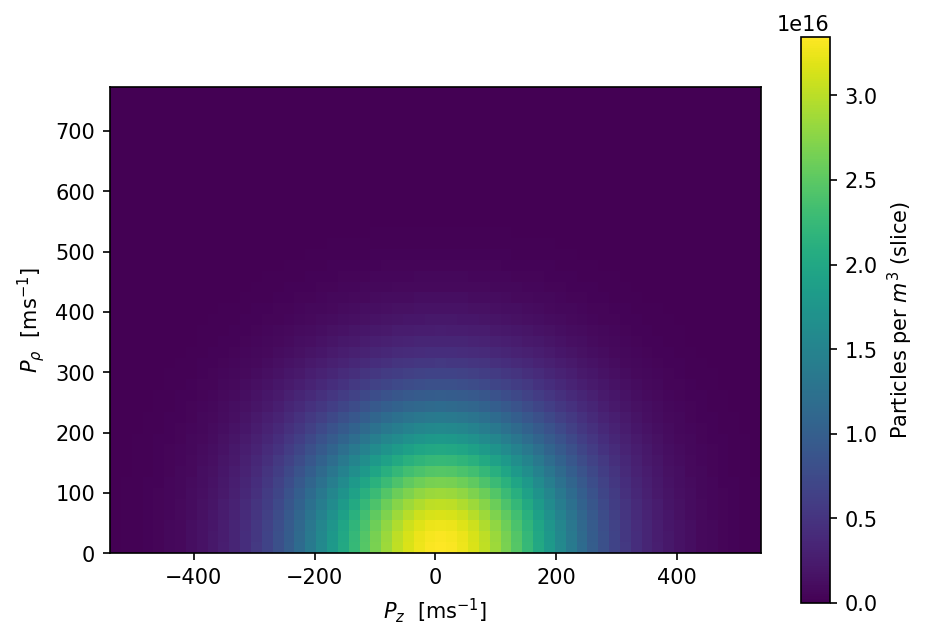

In [8]:


plt.figure(figsize=(7,5),dpi=150)
plt.imshow(dist.f.T,origin='lower',extent=(-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI(),0,dist.grid.rlim*dist.VScale_SI()))
plt.colorbar(label=r'Particles per $m^3$ (slice)')

plt.ylabel(r"$P_\rho$  [ms$^{-1}$]")
plt.xlabel(r"$P_z$  [ms$^{-1}$]")

Text(0, 0.5, '$P_z$  [ms$^{-1}$]')

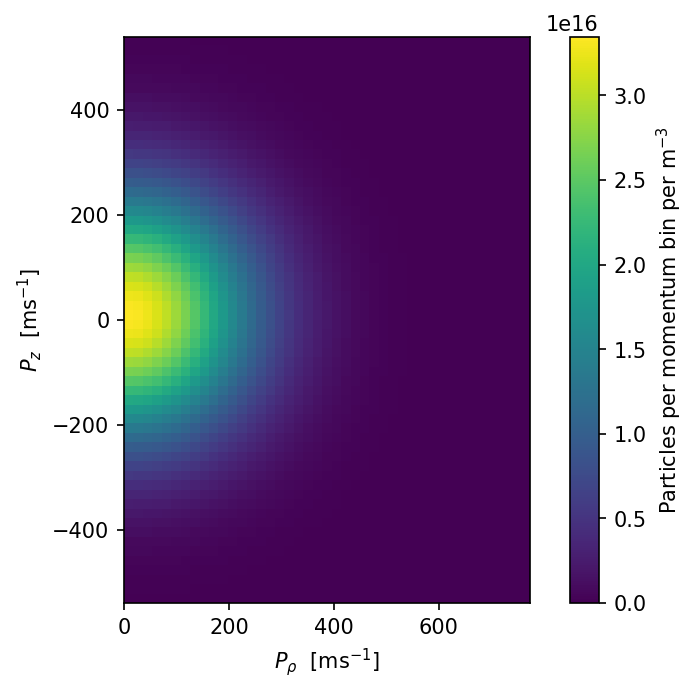

In [9]:
plt.figure(figsize=(7,5),dpi=150)
plt.imshow(dist.f,origin='lower',extent=(0,dist.grid.rlim*dist.VScale_SI(),-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI()))
plt.colorbar(label=r'Particles per momentum bin per m$^{-3}$')

plt.xlabel(r"$P_\rho$  [ms$^{-1}$]")
plt.ylabel(r"$P_z$  [ms$^{-1}$]")

30


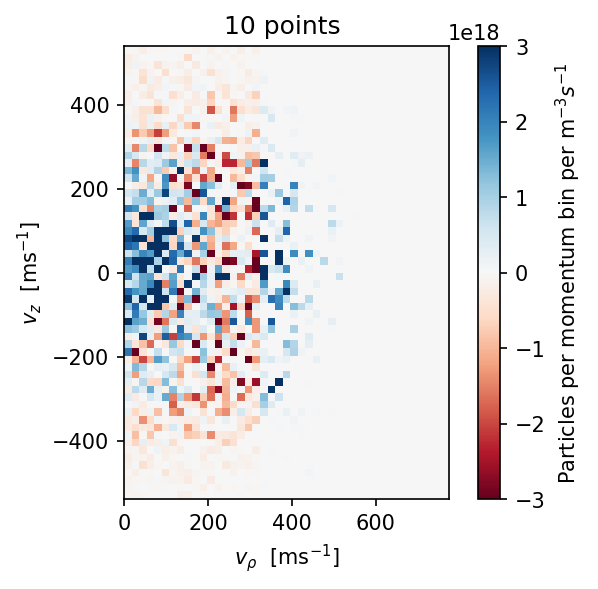

30


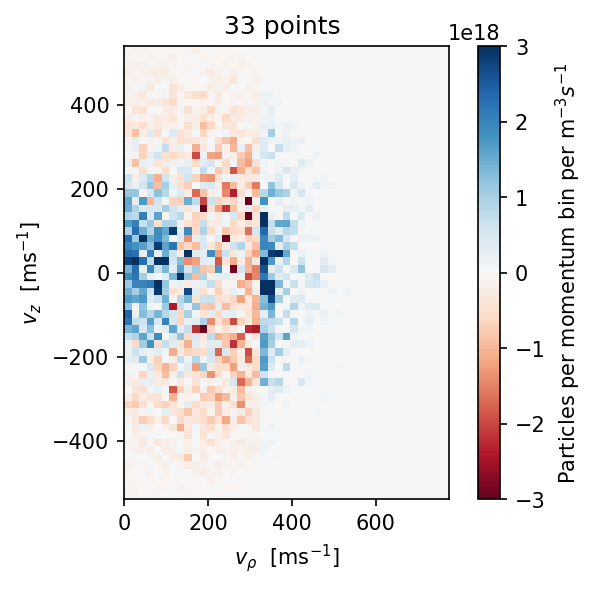

30


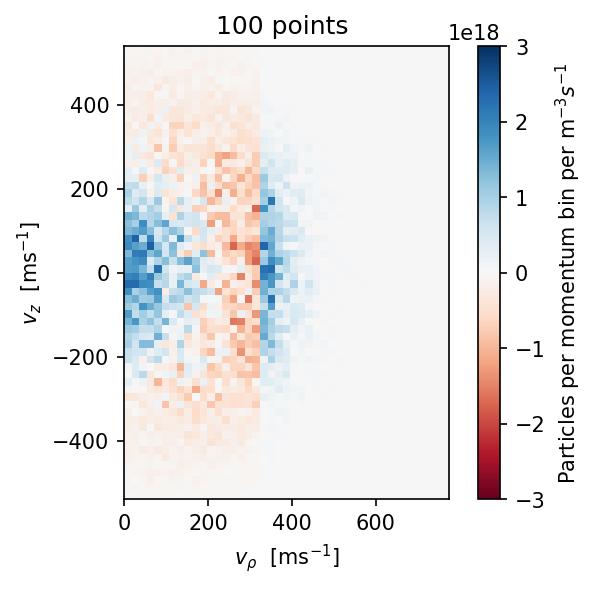

30


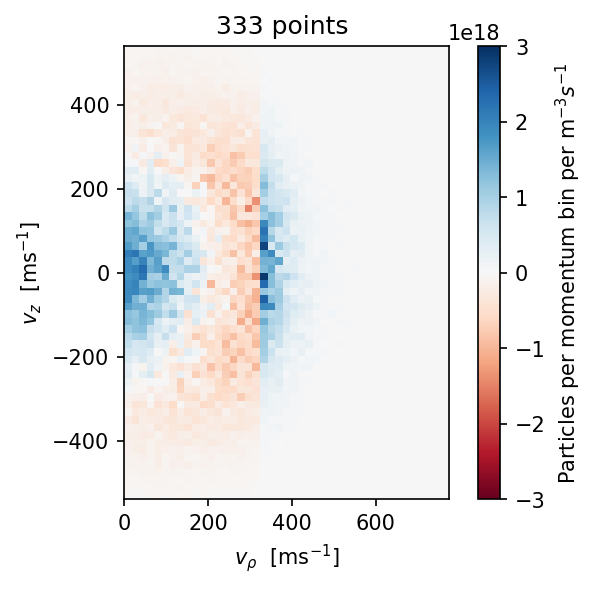

30


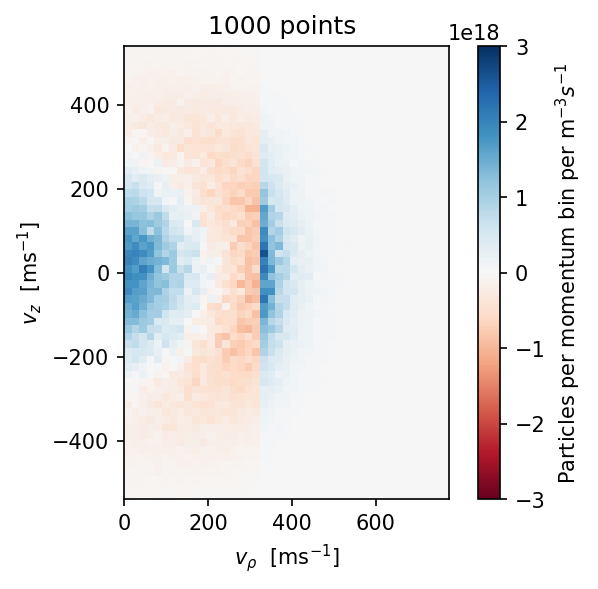

In [12]:
#Convergence test - check MC integration with different precisions

for cols in [10,33,100,333,1000]:
    grid=Grid2D(30)
    dist=SlicedMB2D(T=10, MBPeak=80, gridpoints=30, m=mp, RCut=18,Rho=Density)    
    be=BoltzEvolve.Evolver2D(grid,verbose=True)
    plt.figure(figsize=(5,4),dpi=150)
    dfdt= be.GetDfDtFast(dist, cols)
    plt.imshow(dfdt,cmap='RdBu',origin='lower',extent=(0,dist.grid.rlim*dist.VScale_SI(),-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI()))
    plt.colorbar(label=r'Particles per momentum bin per m$^{-3} s^{-1}$')

    plt.xlabel(r"$v_\rho$  [ms$^{-1}$]")
    plt.ylabel(r"$v_z$  [ms$^{-1}$]")
    plt.clim(-3e18,3e18)
    
    plt.title(str(cols)  +" points ")
    plt.savefig("./plots/convergence_"+str(cols)+ ".png",dpi=200,bbox_inches='tight')
    plt.show()




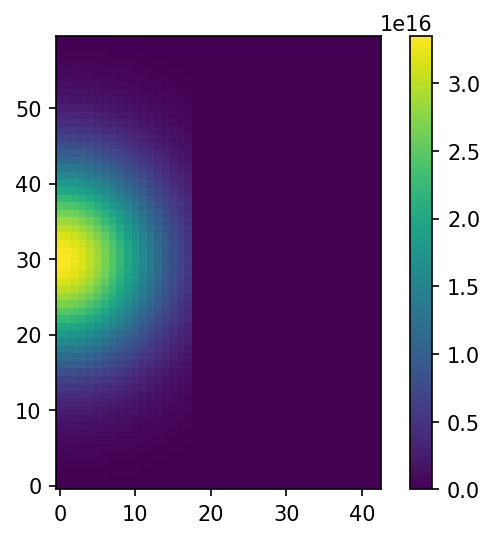

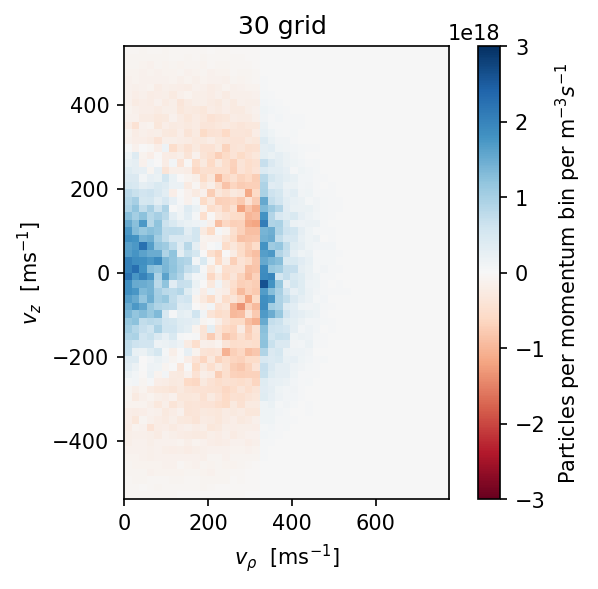

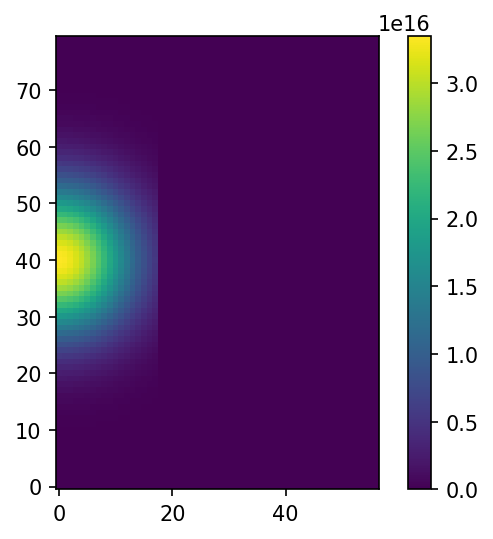

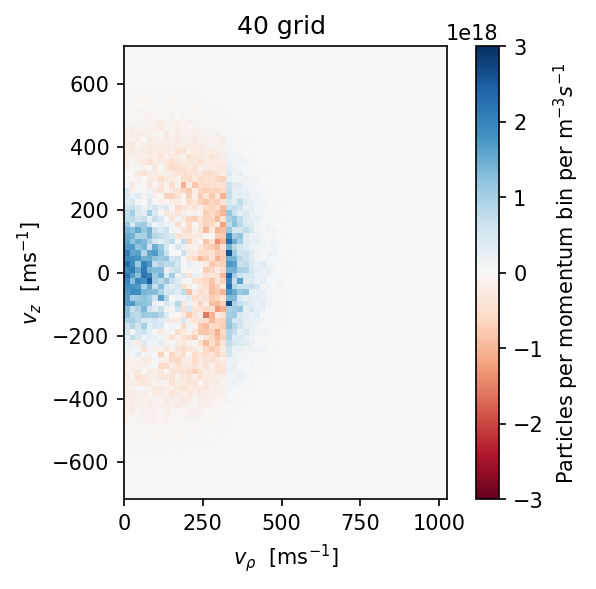

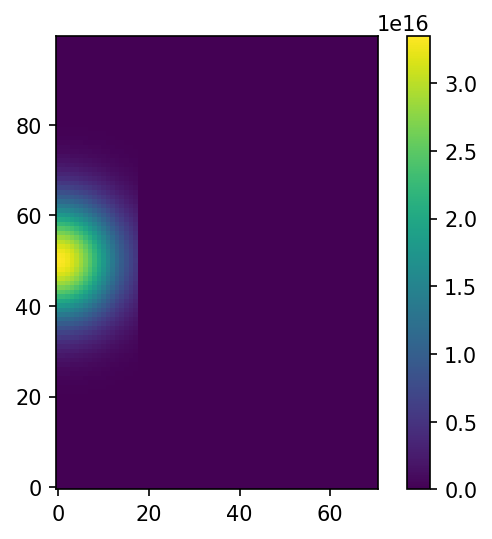

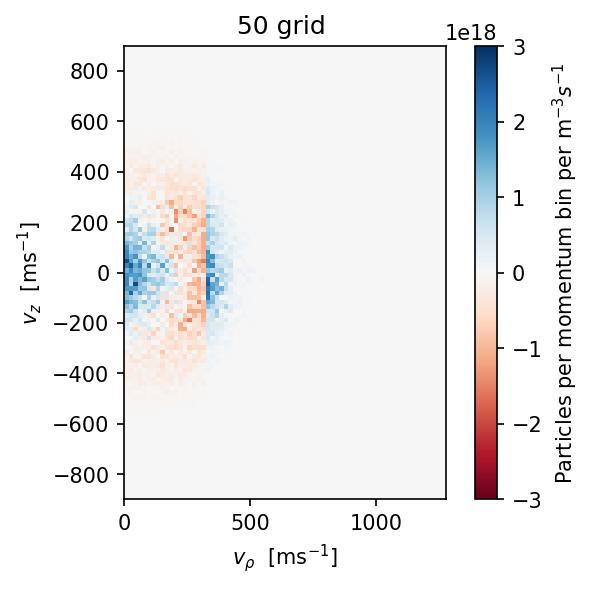

In [14]:
#Convergence test - check grid with different sizes

for size in [30,40,50]:
    plt.figure(figsize=(5,4),dpi=150)
    grid=Grid2D(size)
    be=BoltzEvolve.Evolver2D(grid,verbose=True)
    dist=SlicedMB2D(T=10, MBPeak=80, gridpoints=size, m=mp, RCut=18,Rho=Density)    
    plt.imshow(dist.f,origin='lower')
    plt.colorbar()
    plt.show()
    
    plt.figure(figsize=(5,4),dpi=150)
    dfdt= be.GetDfDtFast(dist, 500)
    plt.imshow(dfdt,cmap='RdBu',origin='lower',extent=(0,dist.grid.rlim*dist.VScale_SI(),-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI()))
    plt.colorbar(label=r'Particles per momentum bin per m$^{-3} s^{-1}$')
    plt.xlabel(r"$v_\rho$  [ms$^{-1}$]")
    plt.ylabel(r"$v_z$  [ms$^{-1}$]")
    plt.clim(-3e18,3e18)
    
    plt.title(str(size)  +" grid ")
    plt.savefig("./plots/convergencegrid_"+str(size)+ ".png",dpi=200,bbox_inches='tight')
    plt.show()

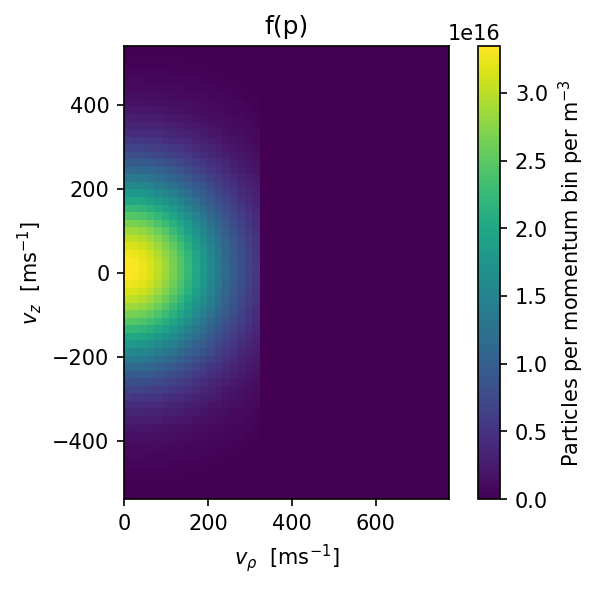

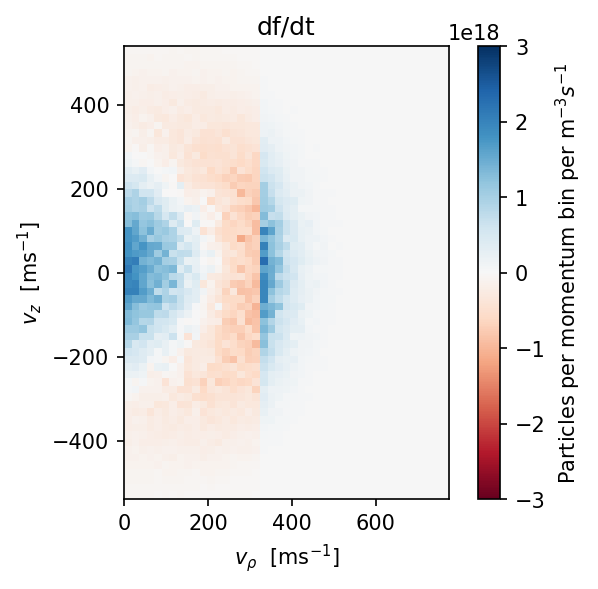

In [15]:
#Show an example dfdt map

size=30
plt.figure(figsize=(5,4),dpi=150)
grid=Grid2D(size)
be=BoltzEvolve.Evolver2D(grid,verbose=True)
dist=SlicedMB2D(T=10, MBPeak=80, gridpoints=size, m=mp, ZCut=100,Rho=Density,RCut=18)    
plt.imshow(dist.f,origin='lower',extent=(0,dist.grid.rlim*dist.VScale_SI(),-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI()))
plt.colorbar(label=r'Particles per momentum bin per m$^{-3}$')
plt.title("f(p)")
plt.xlabel(r"$v_\rho$  [ms$^{-1}$]")
plt.ylabel(r"$v_z$  [ms$^{-1}$]")


plt.savefig("./plots/f_1.png",dpi=200,bbox_inches='tight')
plt.show()


plt.figure(figsize=(5,4),dpi=150)
dfdt= be.GetDfDtFast(dist, 1000)
plt.imshow(dfdt,cmap='RdBu',origin='lower',extent=(0,dist.grid.rlim*dist.VScale_SI(),-dist.grid.zlim*dist.VScale_SI(),dist.grid.zlim*dist.VScale_SI()))
plt.colorbar(label=r'Particles per momentum bin per m$^{-3} s^{-1}$')
plt.title("df/dt")
plt.xlabel(r"$v_\rho$  [ms$^{-1}$]")
plt.ylabel(r"$v_z$  [ms$^{-1}$]")
plt.clim(-3e18,3e18)


plt.savefig("./plots/dfdx_1.png",dpi=200,bbox_inches='tight')
plt.show()

In [20]:
#Thermalizing R and Z sliced distribution simulations

dist=SlicedMB2D(T=10, MBPeak=80, gridpoints=size, m=mp, RCut=100,ZCut=10,Rho=Density)   
be=BoltzEvolve.Evolver2D(grid,verbose=True)
fs_thz,dfdts_thz=be.ThermalizeIt(dist,times=np.linspace(0,0.01,20))


dist=SlicedMB2D(T=10, MBPeak=80, gridpoints=size, m=mp, RCut=15,ZCut=100,Rho=Density)    
be=BoltzEvolve.Evolver2D(grid,verbose=True)
fs_thr,dfdts_thr=be.ThermalizeIt(dist,times=np.linspace(0,0.01,20))





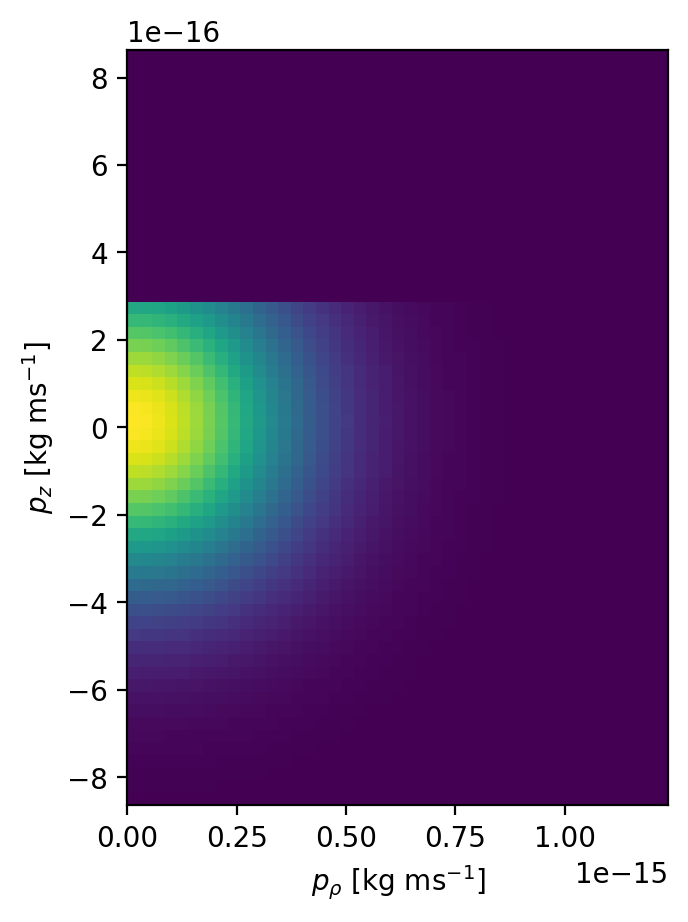

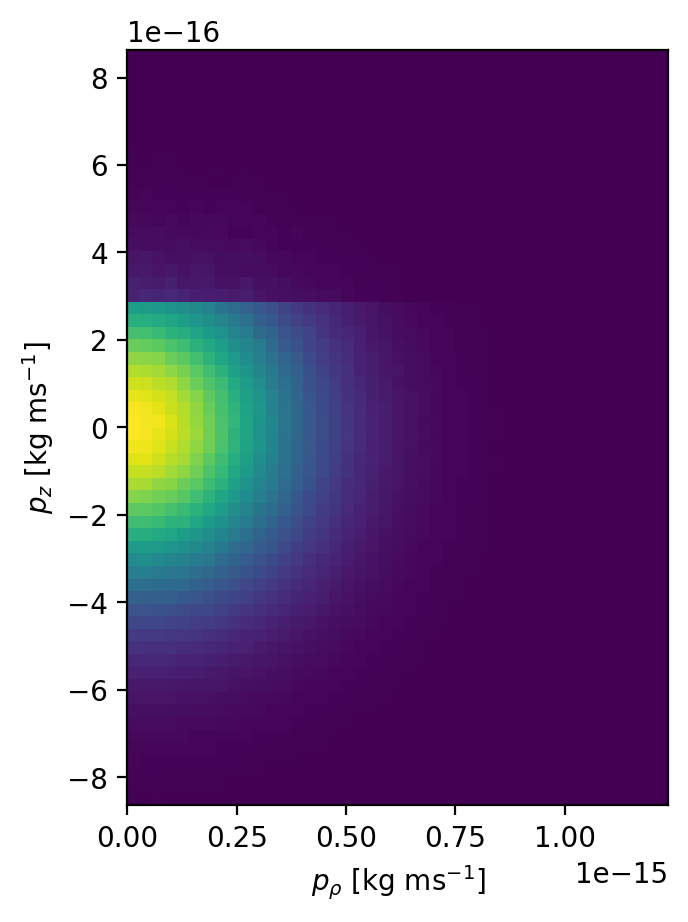

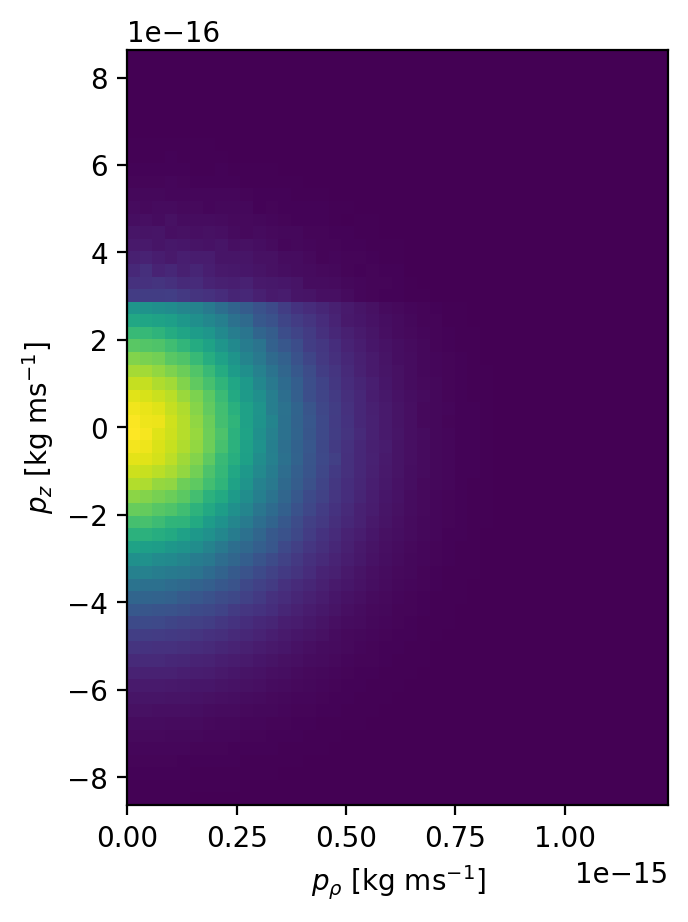

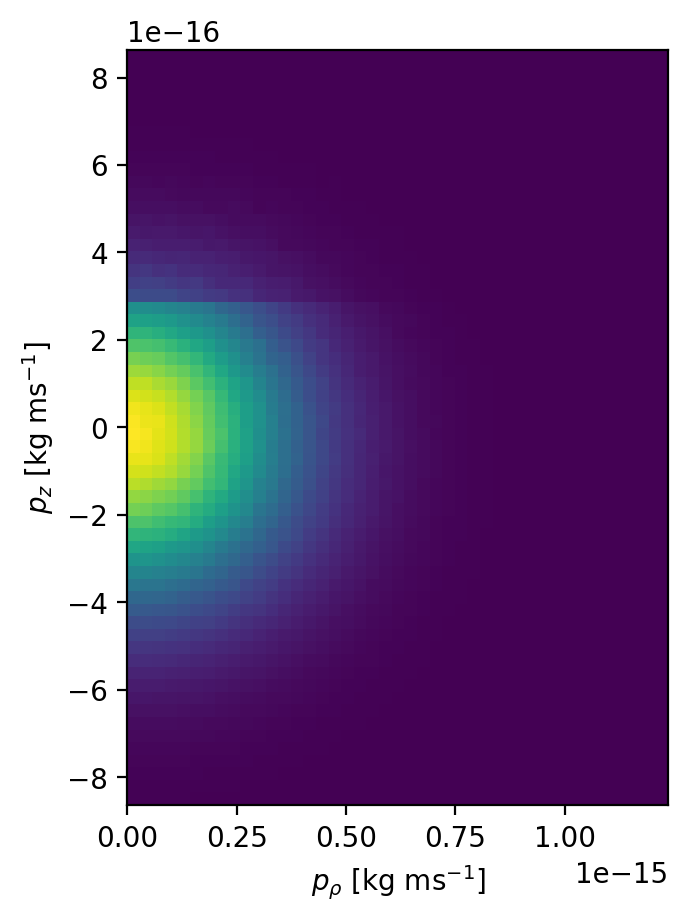

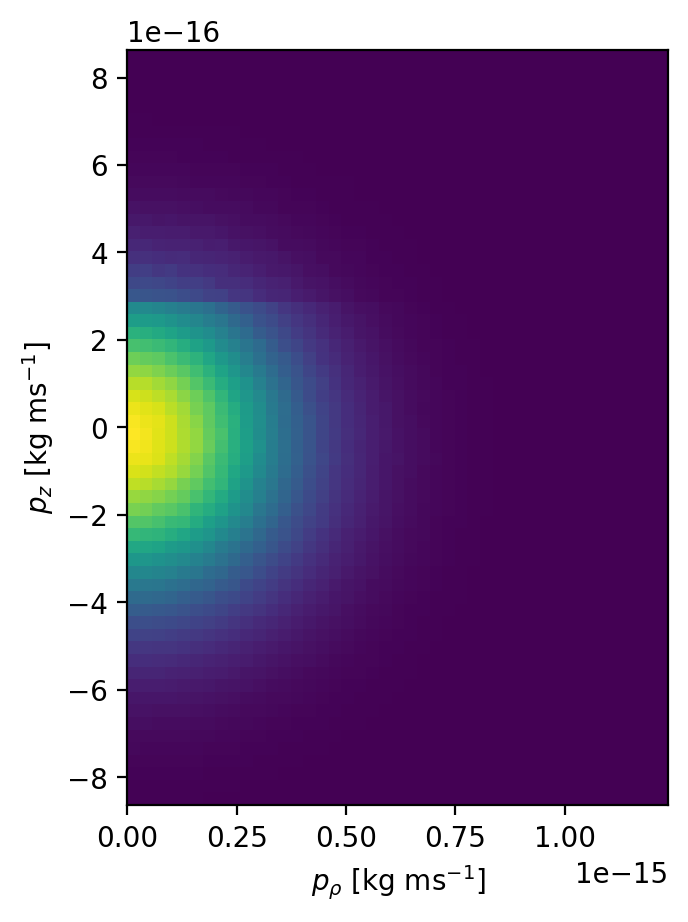

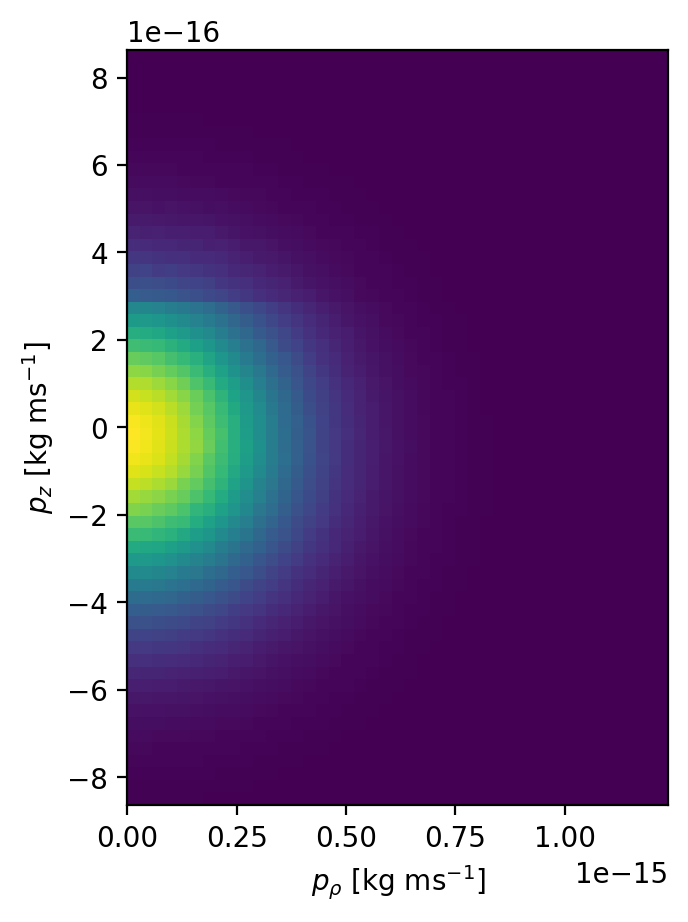

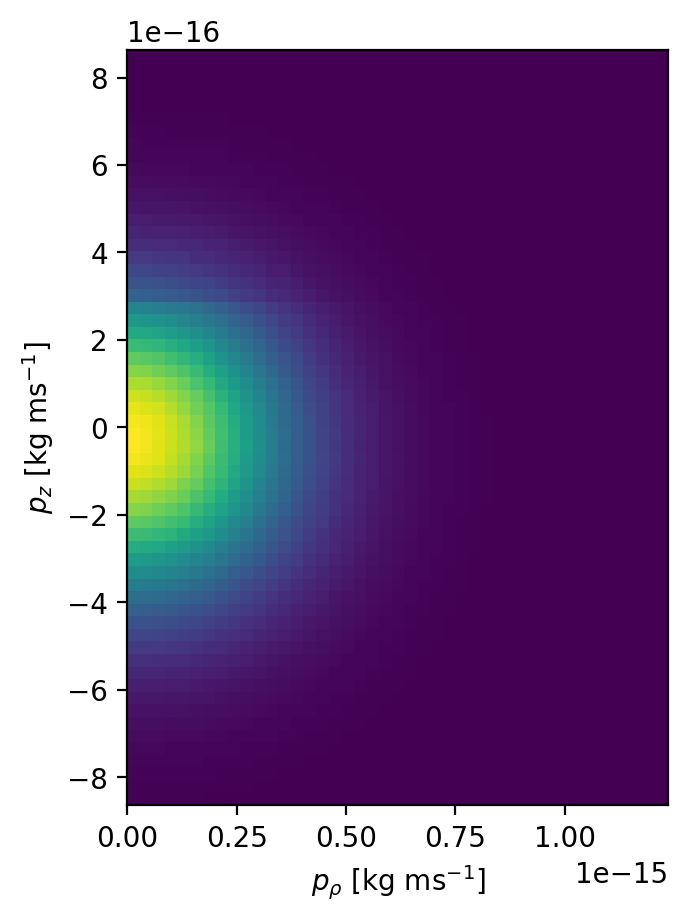

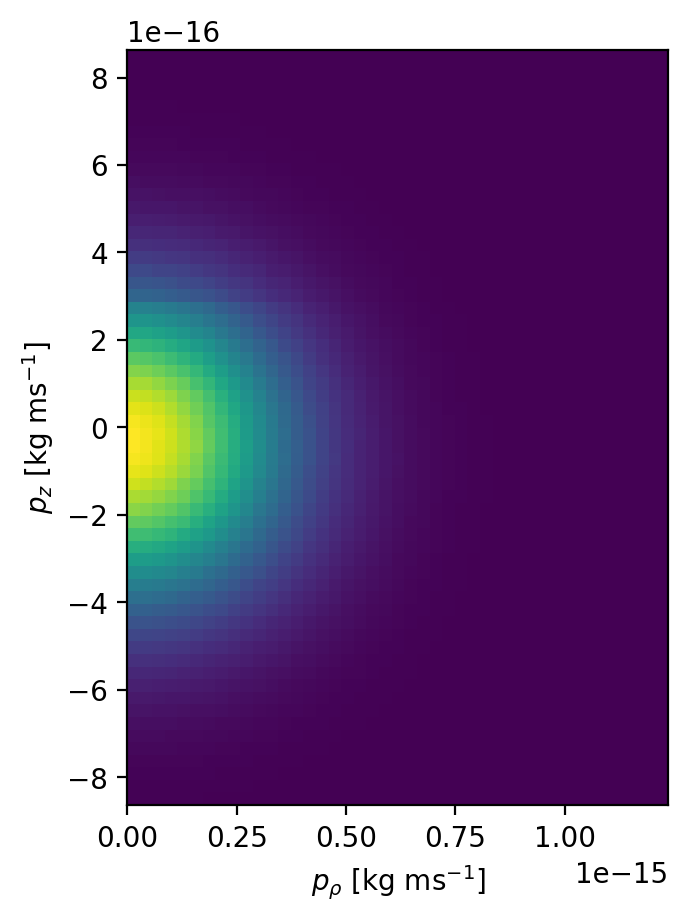

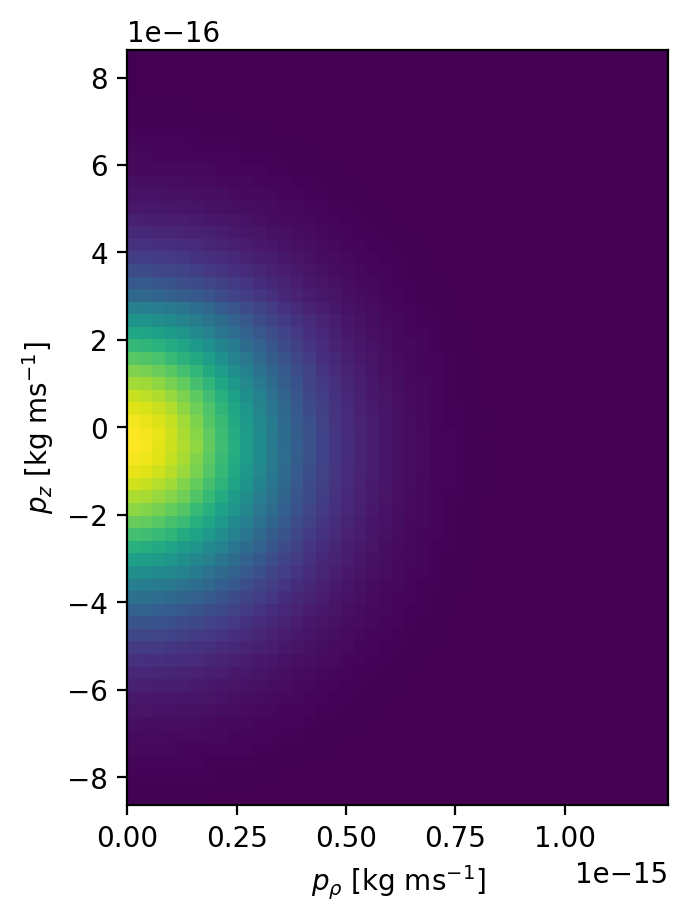

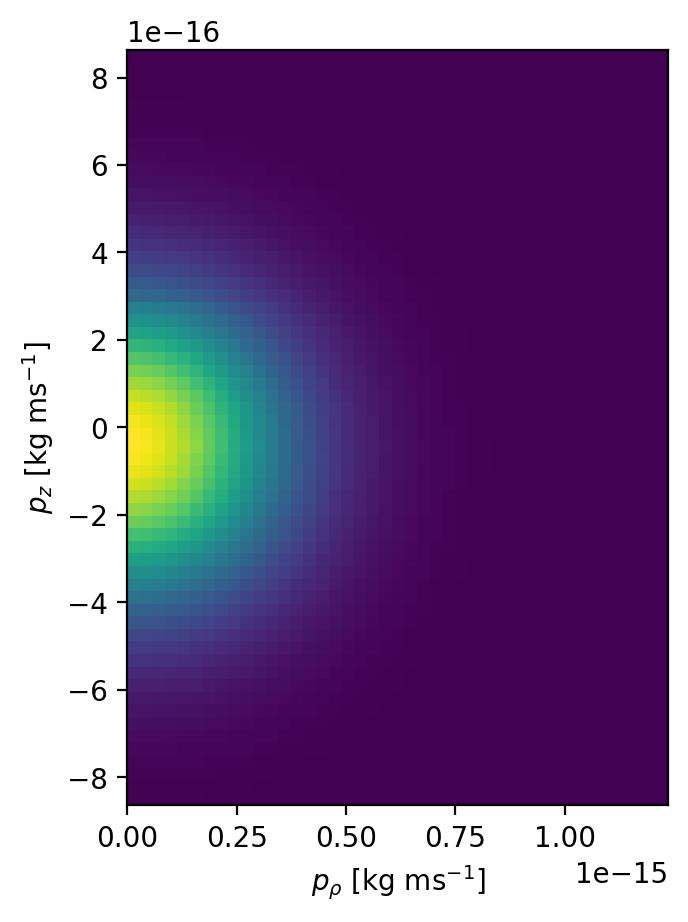

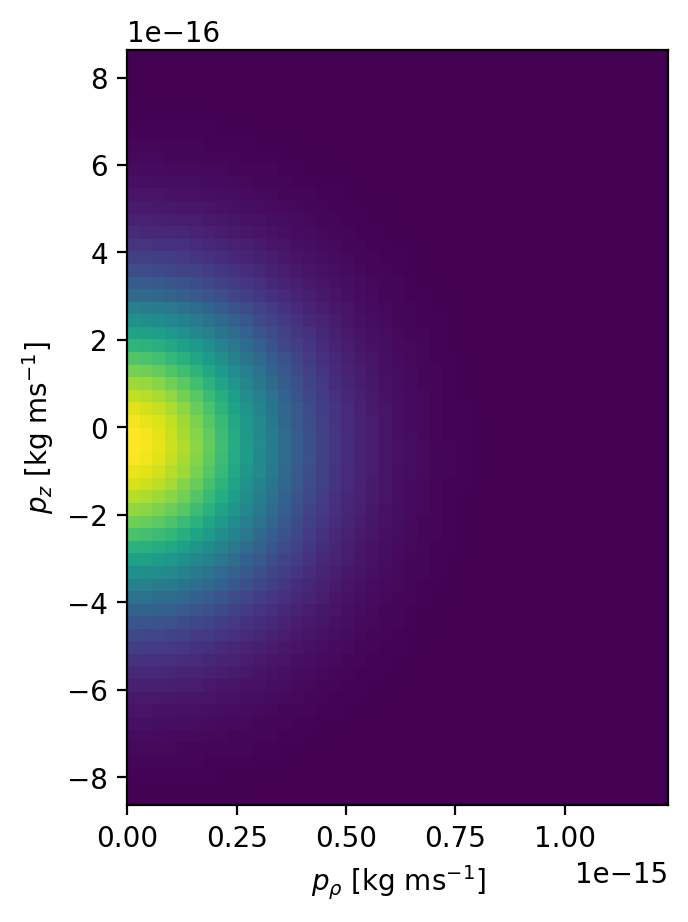

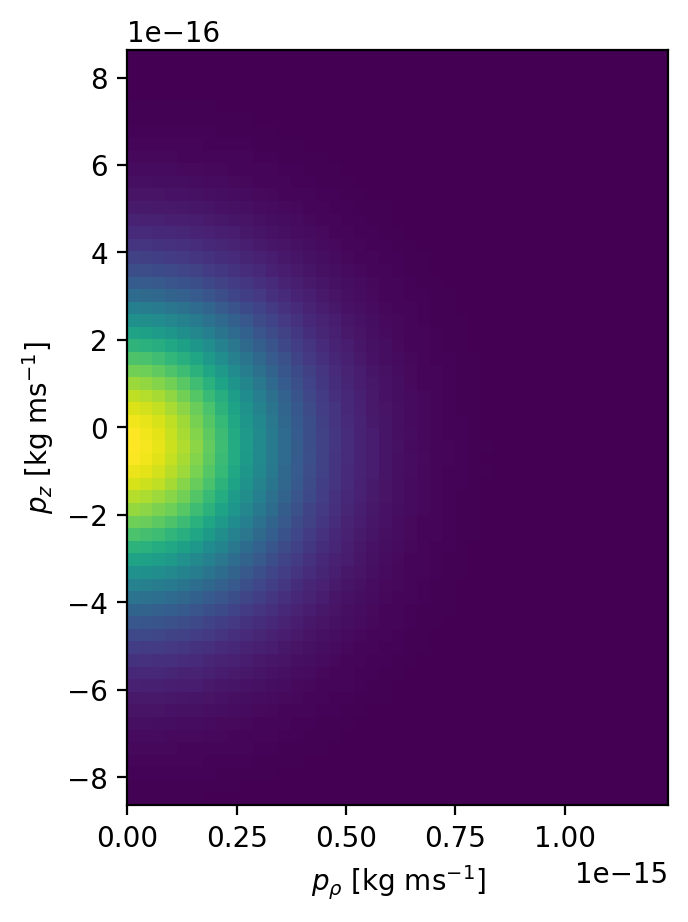

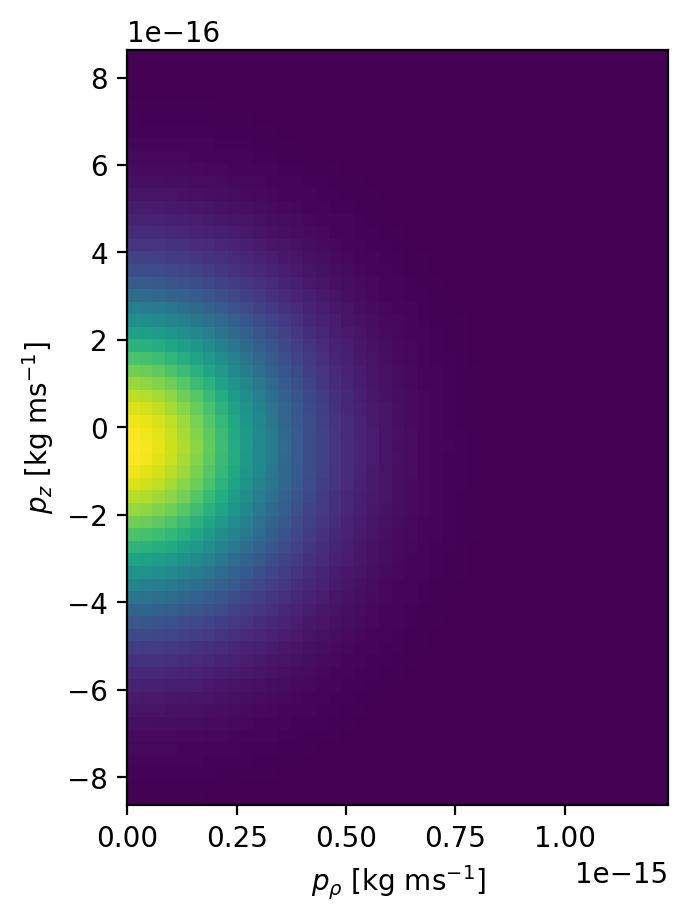

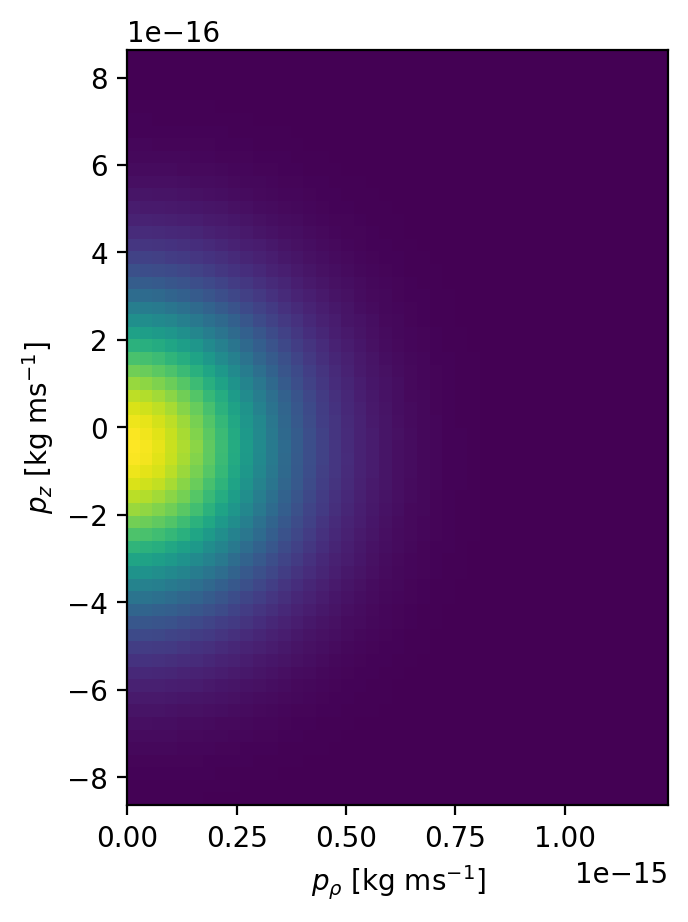

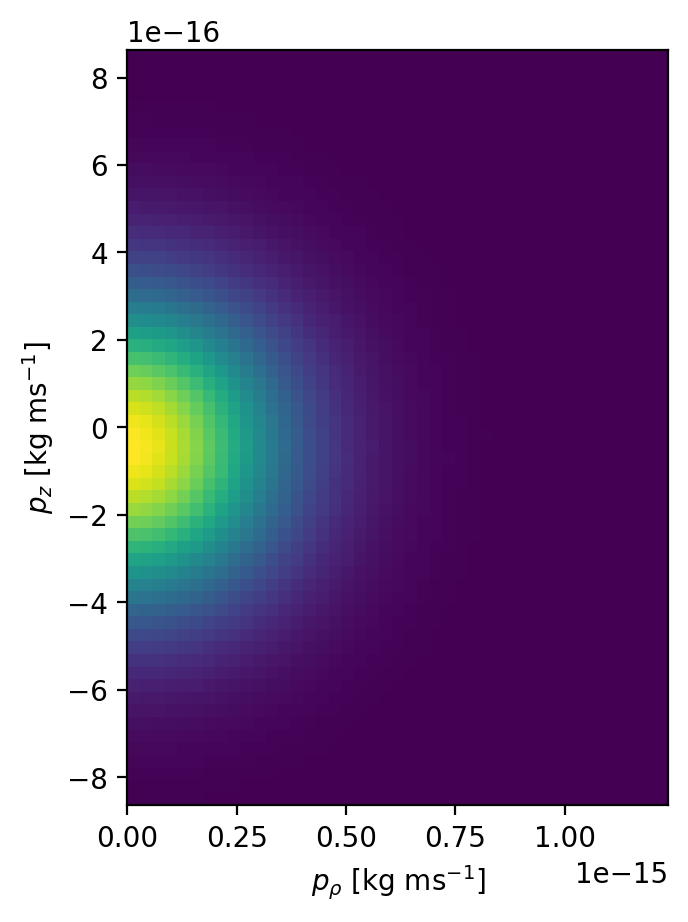

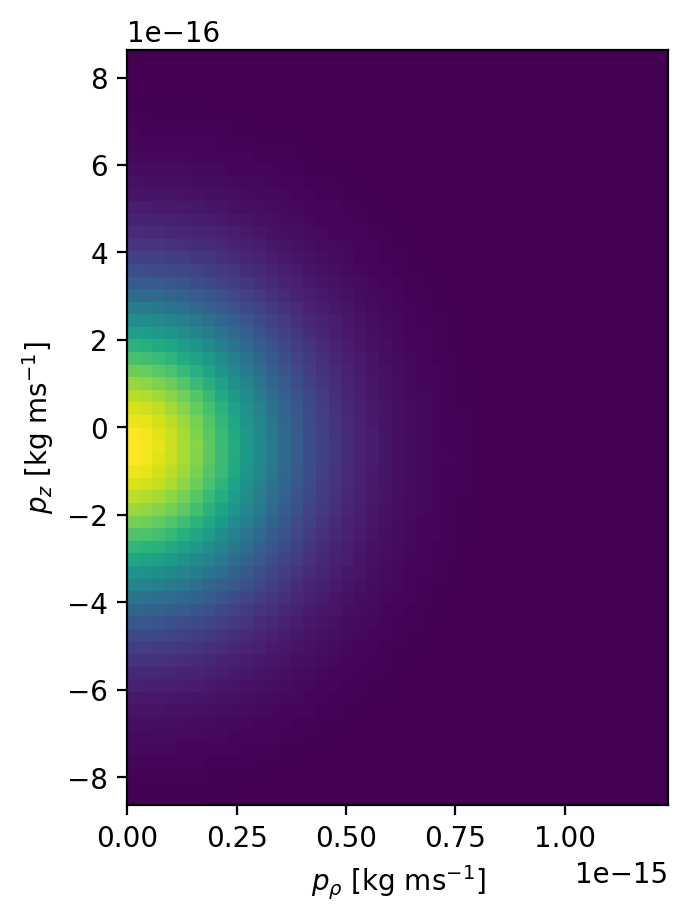

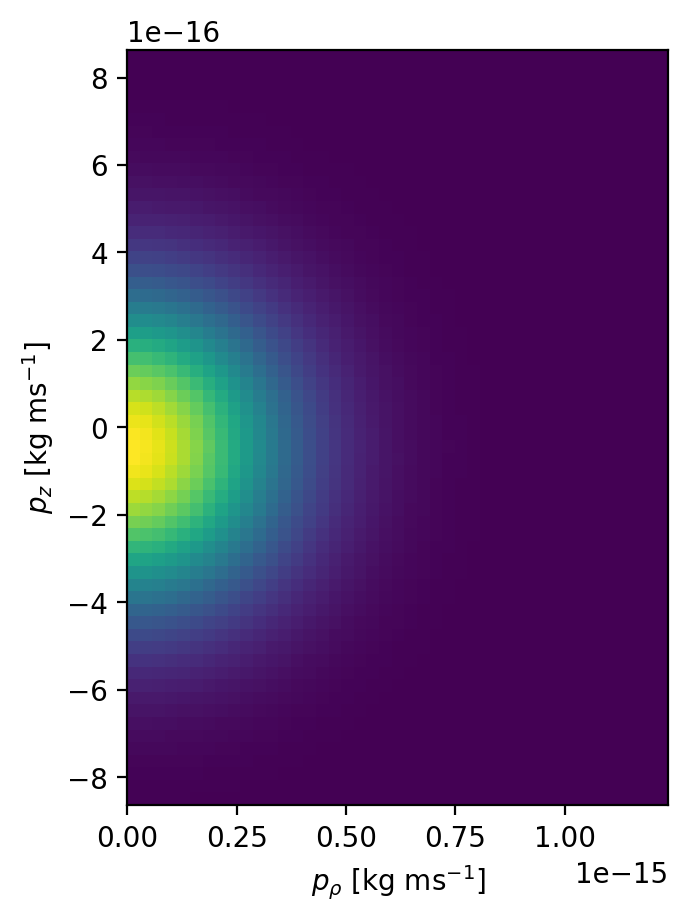

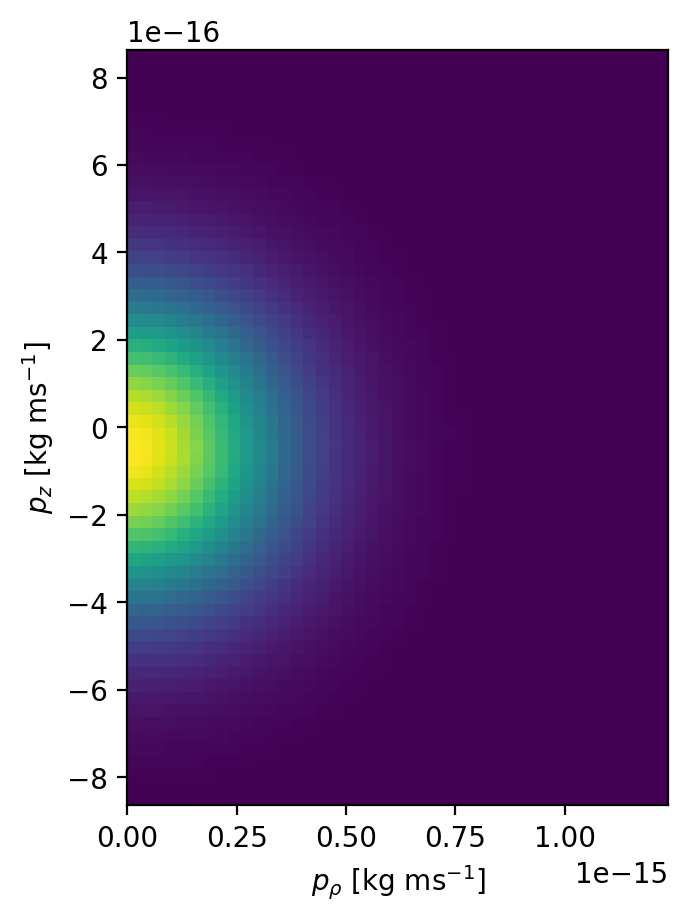

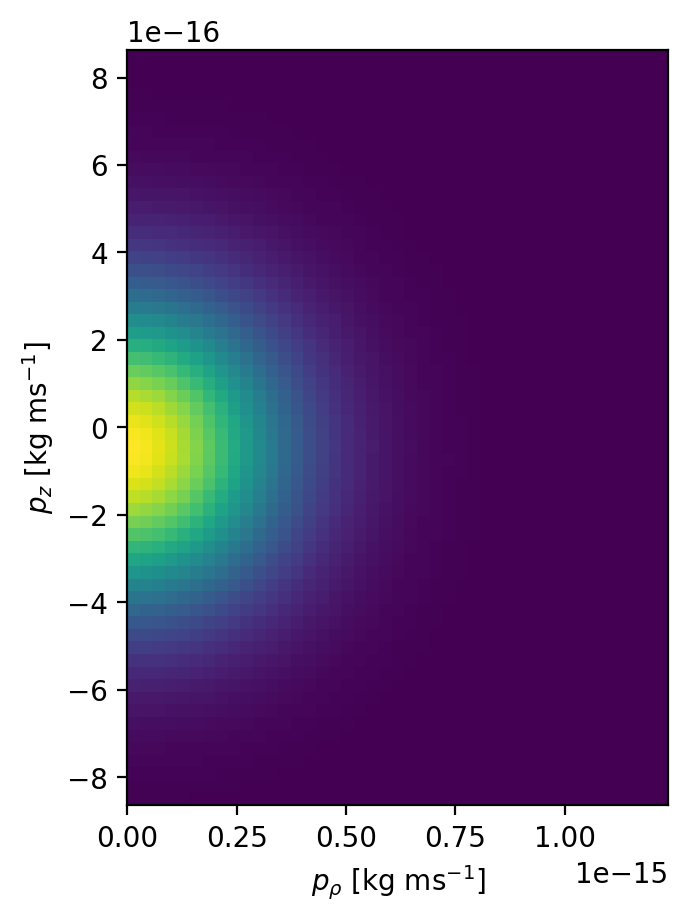

In [21]:
#Make the plots for one of them, to turn into a .gif

#fs=fs_thr
fs=fs_thz

cnt=0
cutpos=18*np.ones(20)
for f in fs:
    plt.figure(figsize=(5,5),dpi=200)
    plt.imshow(f,origin='lower',extent=(0,dist.grid.rlim*dist.PScale_SI(),-dist.grid.zlim*dist.PScale_SI(),dist.grid.zlim*dist.PScale_SI()))
    plt.ylabel(r"$p_z$ [kg ms$^{-1}$]")
    plt.xlabel(r"$p_\rho$ [kg ms$^{-1}$]")
    plt.clim(0,np.max(f))
    cnt=cnt+1
    plt.savefig("./plots/tmp/"+str(cnt).zfill(2)+".png",dpi=200,bbox_inches='tight')
    plt.show()



In [71]:
#Time independent R cut
grid=Grid2D(30)
def CutFunction(t,grid):
    return (grid.RR2<15)

dist=SlicedMB2D(T=10, MBPeak=80, gridpoints=30, m=mp, RCut=15,Rho=Density)    
be=BoltzEvolve.Evolver2D(grid,verbose=True)
fs,dfdts,times,E,P,cutpos=be.CoolIt(dist,CutFunction,timesteps=20,StepFactor=0.05)



Cooling step 0, t=3.717762157188992e-05, dp=0.033914911725517326, dE=0.07746406305664674
Cooling step 1, t=8.66461296835093e-05, dp=0.038395805147450966, dE=0.08989320889602716
Cooling step 2, t=0.00014284504277262234, dp=0.03713502857651485, dE=0.0899688179596662
Cooling step 3, t=0.00020296037583846915, dp=0.03398115479393867, dE=0.0833716912535244
Cooling step 4, t=0.0002713380774255492, dp=0.03371952866558675, dE=0.08375876825345484
Cooling step 5, t=0.0003500960758748556, dp=0.03303433715398961, dE=0.08447708231557559
Cooling step 6, t=0.00042580753078408227, dp=0.028213247290642847, dE=0.07281583323767246
Cooling step 7, t=0.0005059178281130569, dp=0.027004308775985565, dE=0.07075550954464563
Cooling step 8, t=0.0006023398058703015, dp=0.029378484016702646, dE=0.07821699892150029
Cooling step 9, t=0.0007086522865572549, dp=0.02683192744610535, dE=0.07412572451462882
Cooling step 10, t=0.0008326790337568113, dp=0.029303179542591897, dE=0.08145266887165908
Cooling step 11, t=0.0009

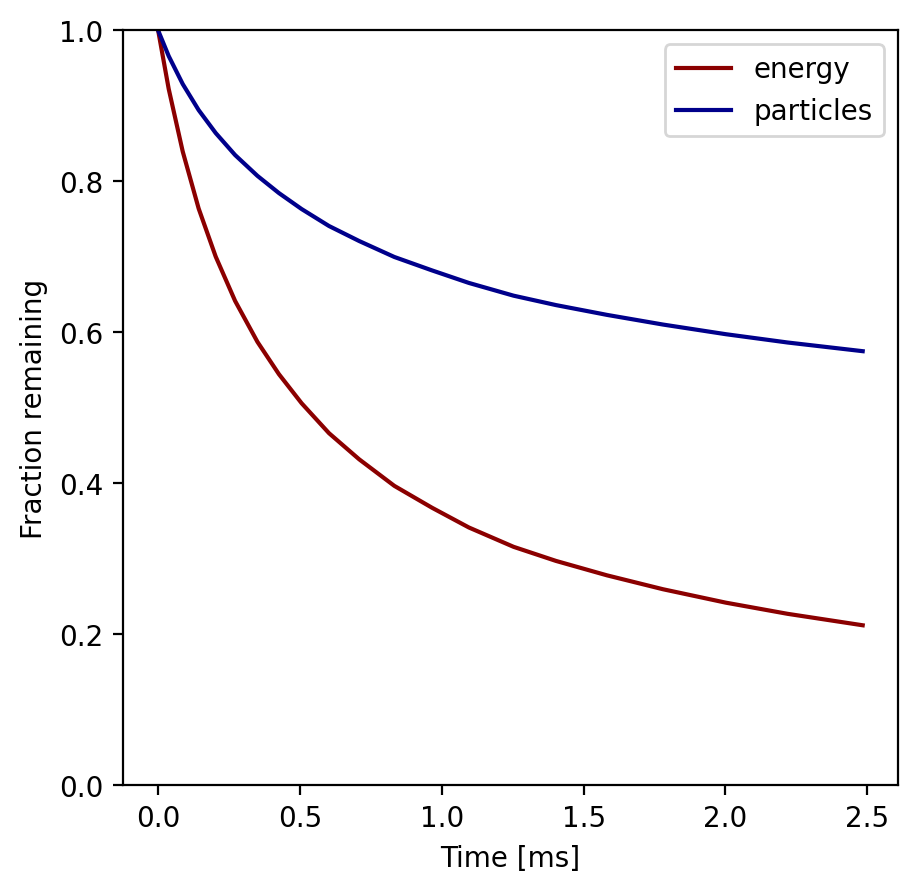

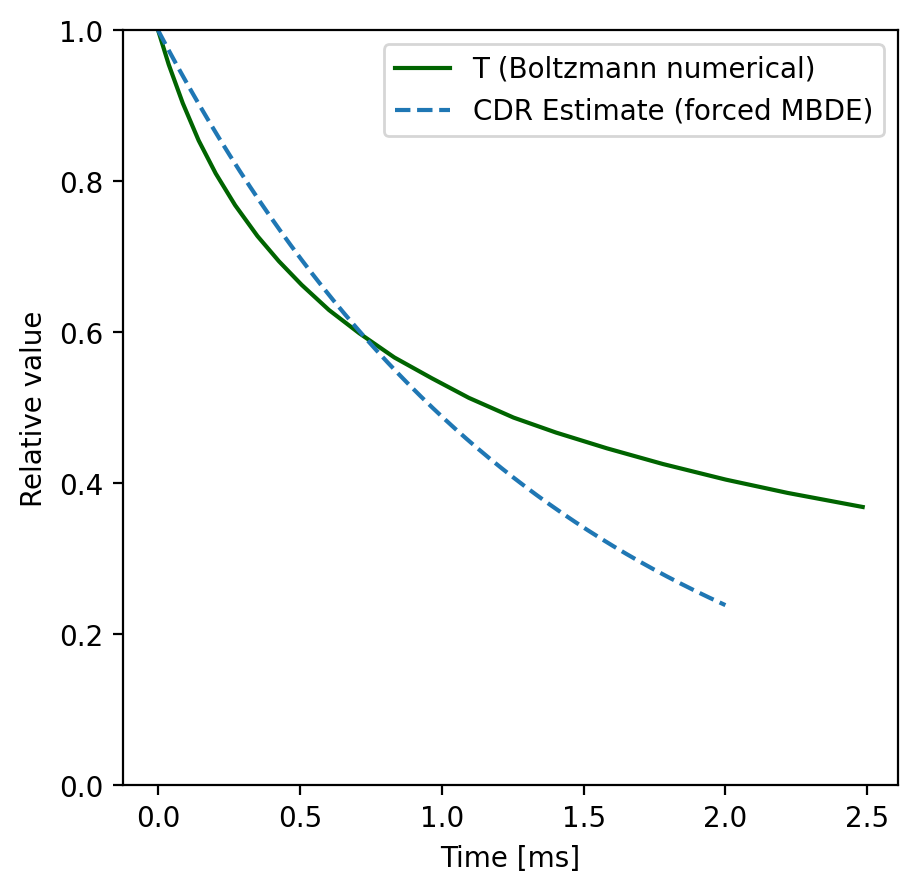

In [73]:
plt.figure(figsize=(5,5),dpi=200)
plt.plot(np.array(times)*1000,np.concatenate([[1],E]),label='energy',color='DarkRed')
plt.plot(np.array(times)*1000,np.concatenate([[1],P]),label='particles',color='DarkBlue')
plt.xlabel("Time [ms]")
plt.ylabel("Fraction remaining")
plt.legend(loc='upper right')
plt.ylim(0,1)
fig = plt.figure(figsize=(5,5),dpi=200)
ax1 = fig.add_subplot(111)

ax1.plot(np.array(times)*1000,np.concatenate([[1],E/P]),label='T (Boltzmann numerical)',color='DarkGreen')

ax1.set_ylim(0,1)


ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Relative value")
vars=np.linspace(0,2,1000)
ax1.plot(vars,np.exp(-716*vars*1e-3),'--',label='CDR Estimate (forced MBDE)')
ax1.legend(loc='upper right')

plt.show()

In [237]:
def MaxBoltz2Darray(mkT,pr,pz,pr0=10):
    sths=np.linspace(0,10,10)
    return np.pi*(2*np.pi*mkT)**(-3/2)*np.exp(-((pr-((1-sths**2)**0.5)*pr0)**2+(pz-pr0*sth)**2)/(2.*mkT)) 




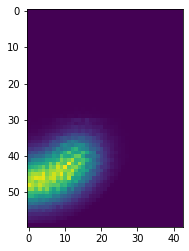

In [557]:
dist=SlicedRDistribution(T=10, MBPeak=20, gridscale=30, m=mp, RCut=18,Rho=Density,pz0=18)    
be=BoltzmannEvolver(grid,verbose=True)

dist2=be.CrescentIt(1.1,dist)
plt.imshow(dist2.f)

In [657]:
grid=Grid(50)
dist=SlicedRDistribution(T=10, MBPeak=30, gridscale=50, m=mp, RCut=100,Rho=Density,pz0=30)    
be=BoltzmannEvolver(grid,verbose=True)
def CutFunction(t,grid):
    return (grid.RR2<30)
fs,dfdts,times,E,P,cutpos=be.WiggleCoolIt(dist,CutFunction,timesteps=20,StepFactor=0.1,crescentangle=0.5)



Cooling step 0, t=2.7953978181947183e-05, dp=0.0017487632255646095, dE=0.003244150272218605
Cooling step 1, t=5.2998627295810954e-05, dp=0.020565355209601576, dE=0.03601984564545569
Cooling step 2, t=8.142169811943485e-05, dp=0.05255402627667265, dE=0.0945270425952077
Cooling step 3, t=0.00011069962664441254, dp=0.07056098793913355, dE=0.1291622218355959
Cooling step 4, t=0.00014150307165753227, dp=0.08487607029973902, dE=0.1593208928789791
Cooling step 5, t=0.0001710588047745697, dp=0.08547791442434298, dE=0.16509856620335786
Cooling step 6, t=0.00020260373529049205, dp=0.09542278171867428, dE=0.18916789208065476
Cooling step 7, t=0.00023572583157763019, dp=0.09666300684126602, dE=0.19633120545396182
Cooling step 8, t=0.0002665085420509099, dp=0.08617355828228022, dE=0.18152459915862754
Cooling step 9, t=0.0002965690703523223, dp=0.07988373687613705, dE=0.17158979788919168
Cooling step 10, t=0.000317784392869542, dp=0.05354973737219013, dE=0.11839772019581596
Cooling step 11, t=0.0003

In [ ]:
meanp=[]
mean0=sum(sum(fs[0]*grid.ZZ2))/sum(sum(fs[0]))
for f in fs:
    meanp.append(sum(sum(f*grid.ZZ2))/sum(sum(f))/mean0)
    

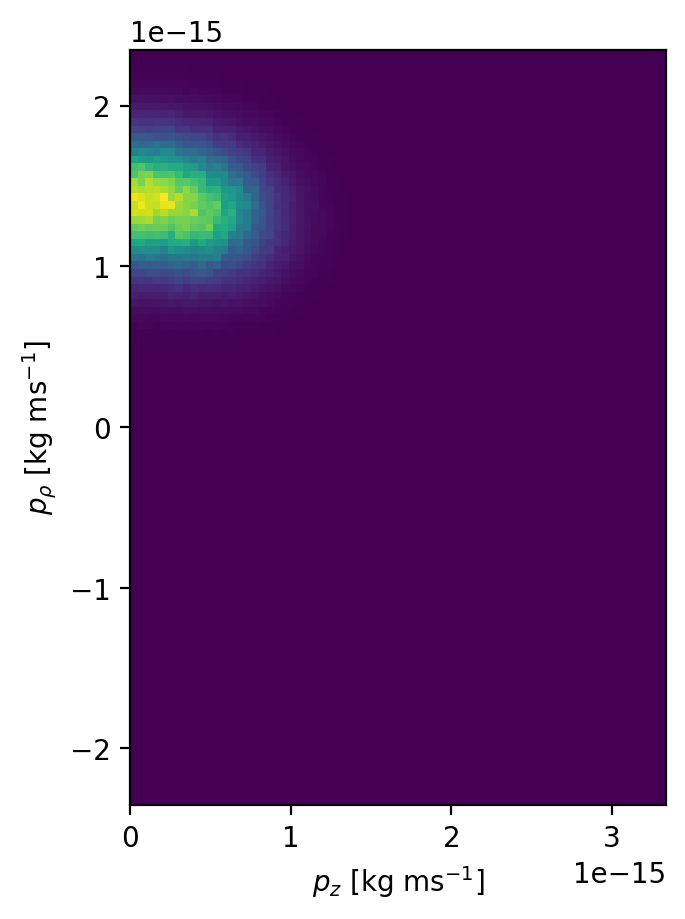

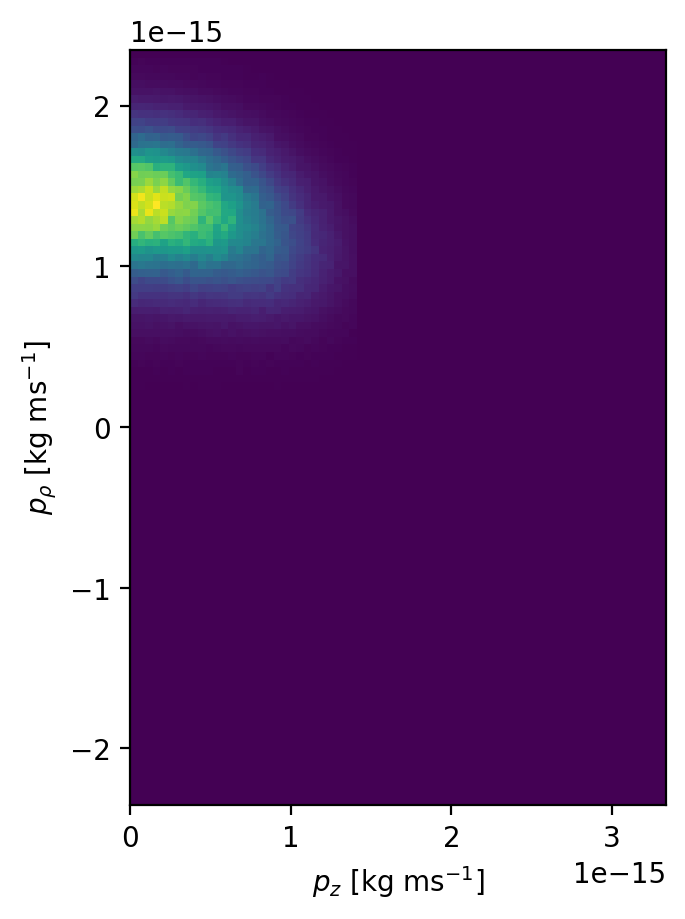

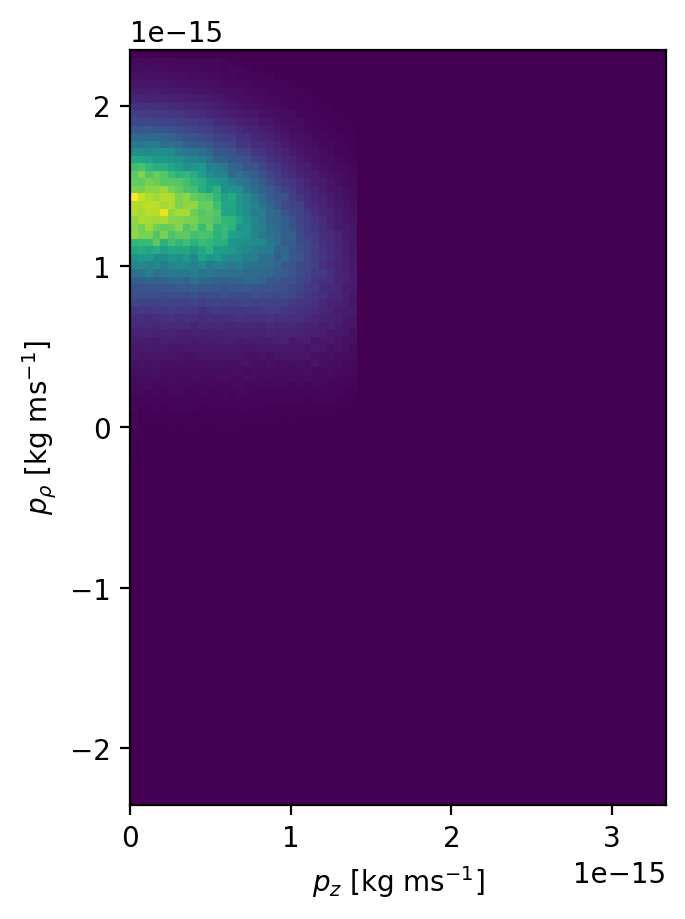

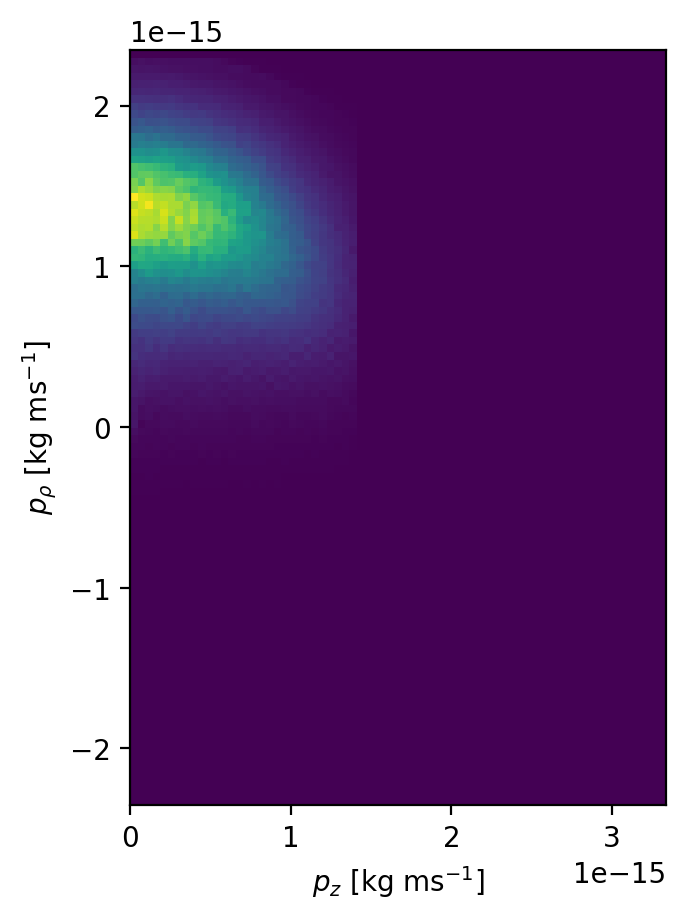

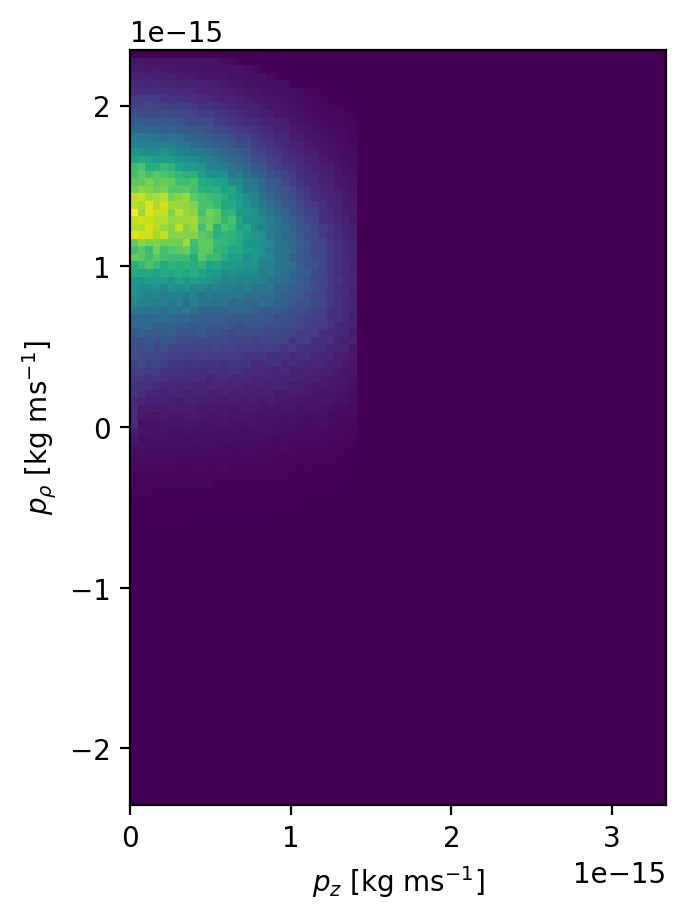

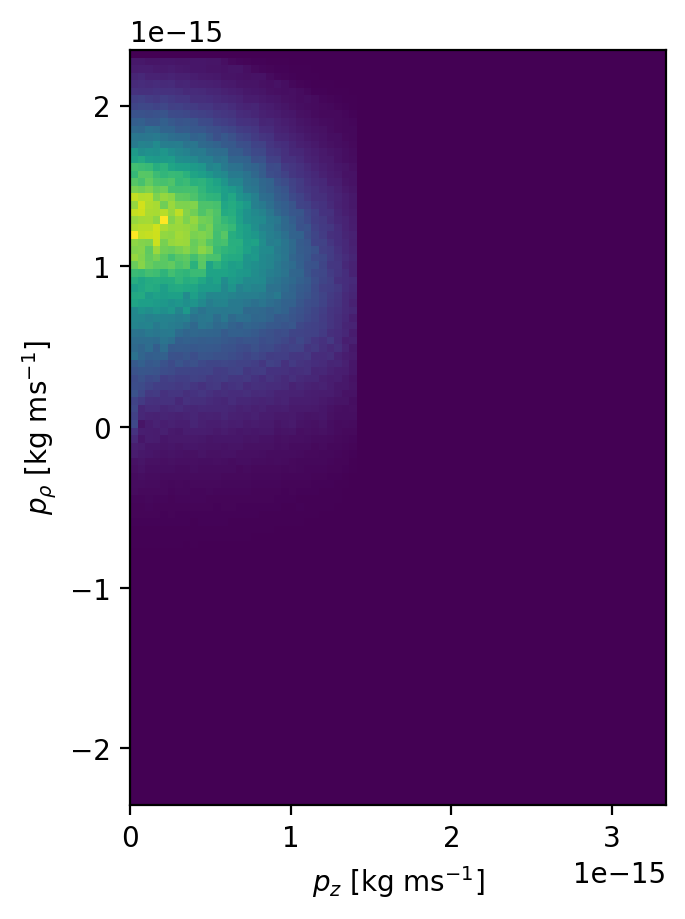

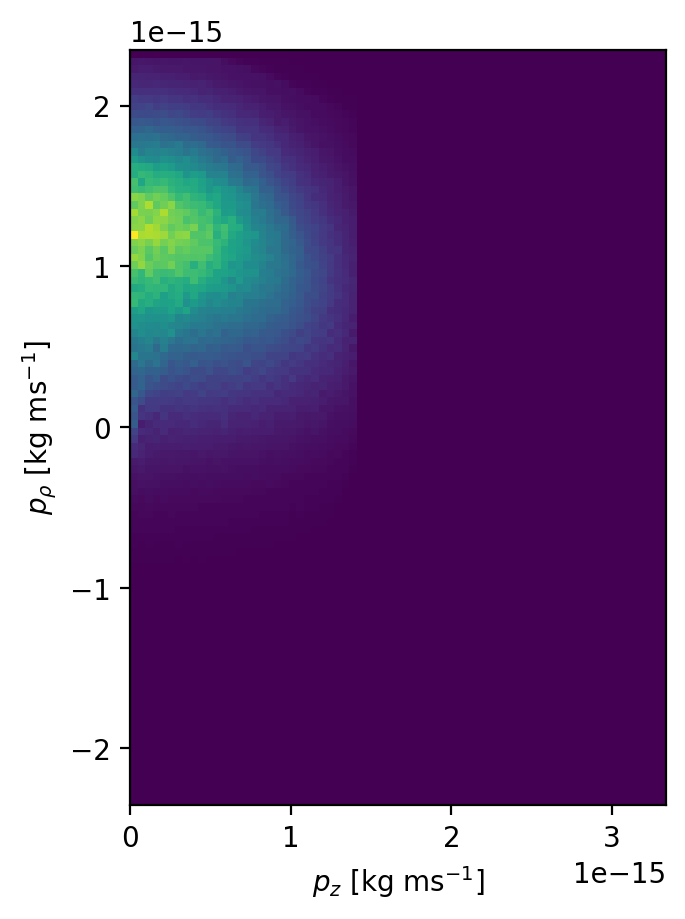

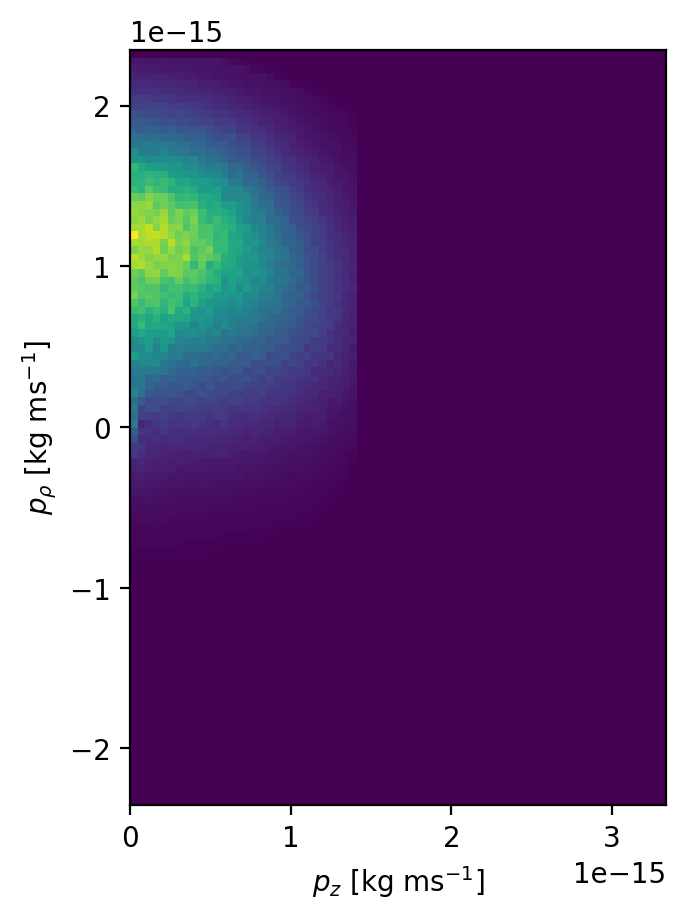

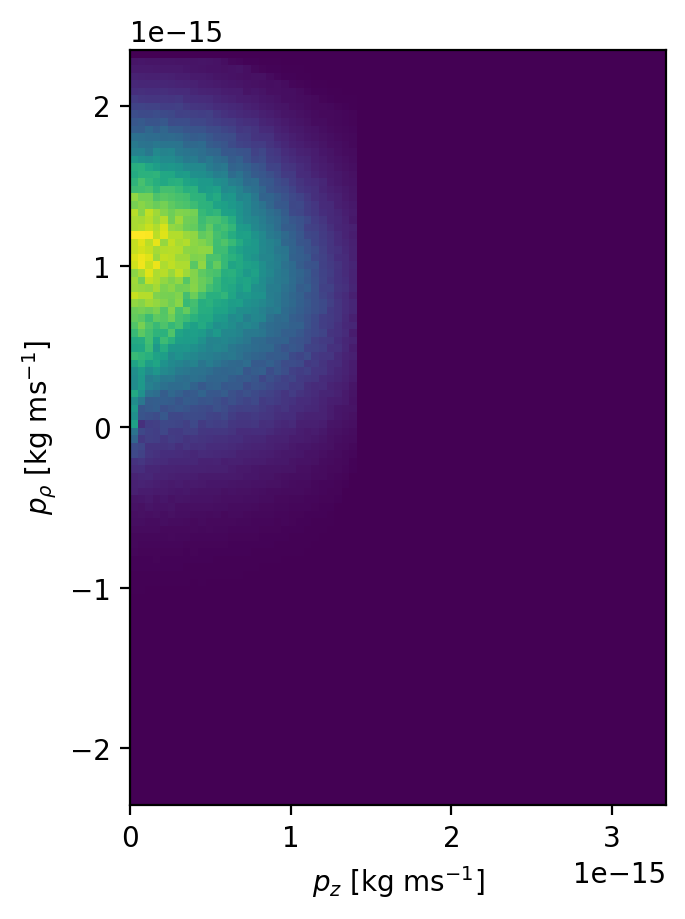

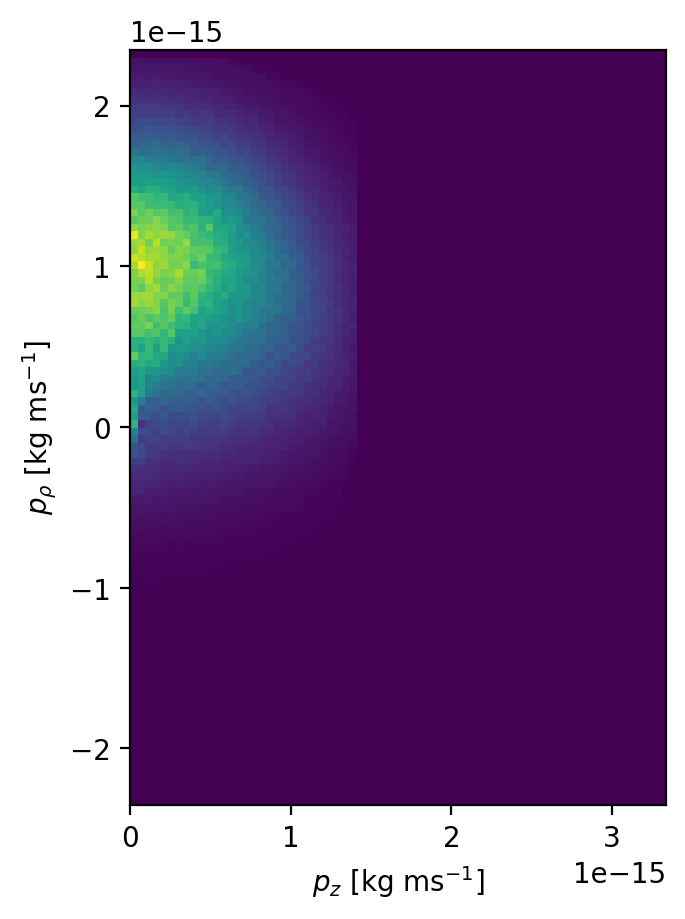

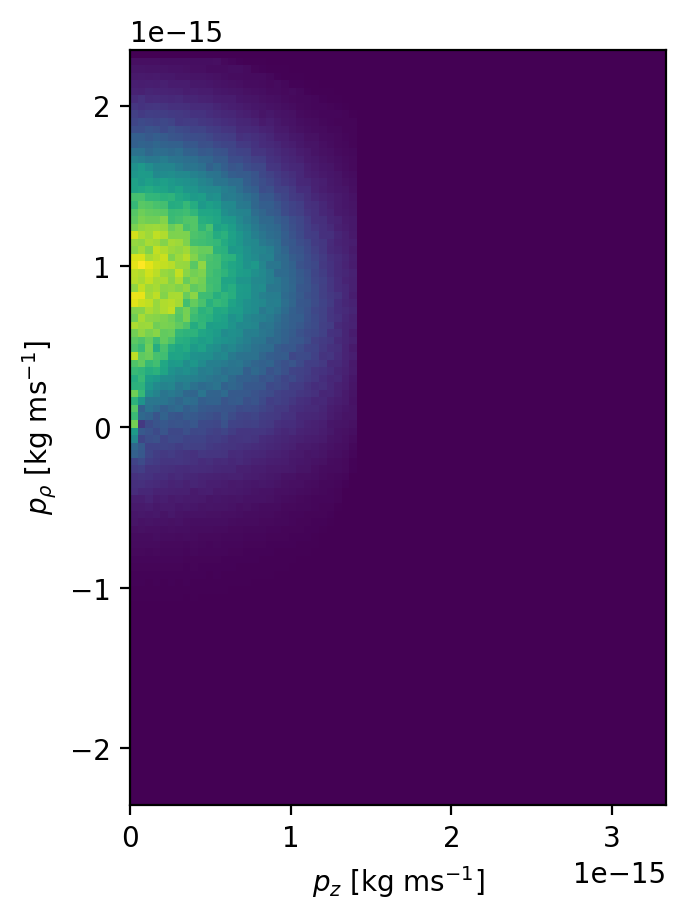

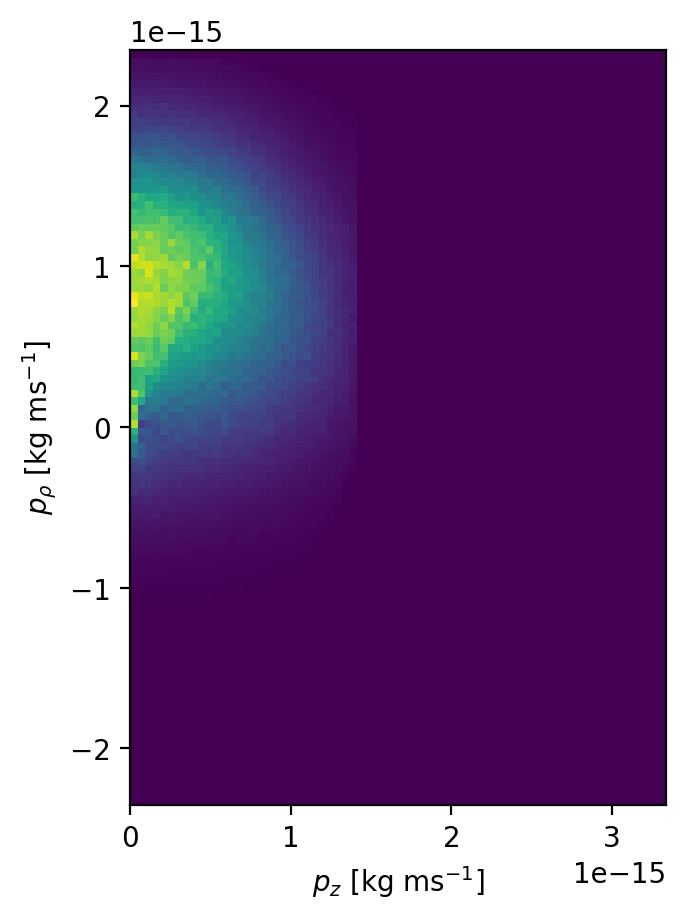

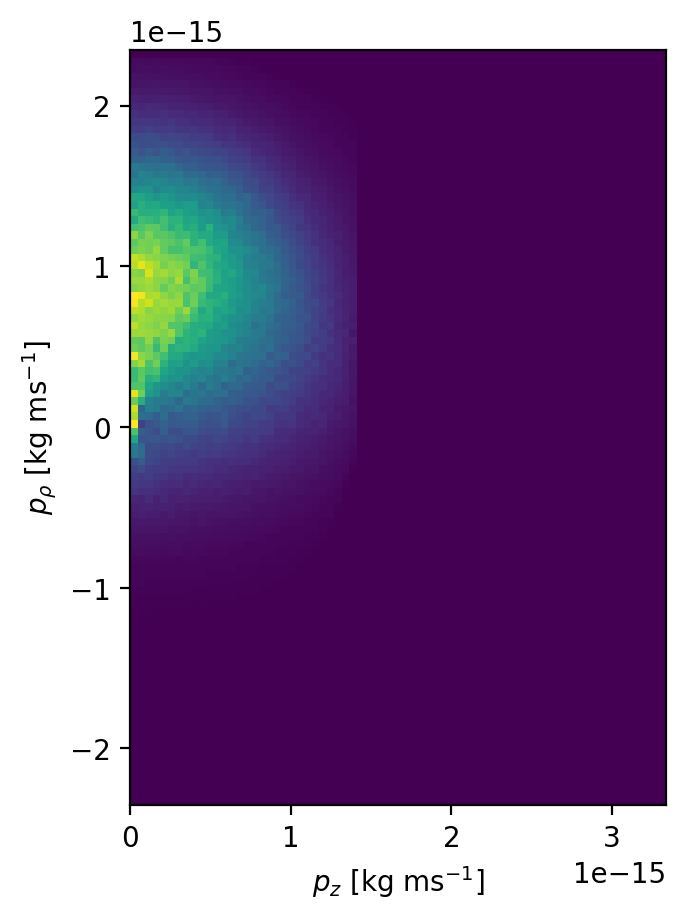

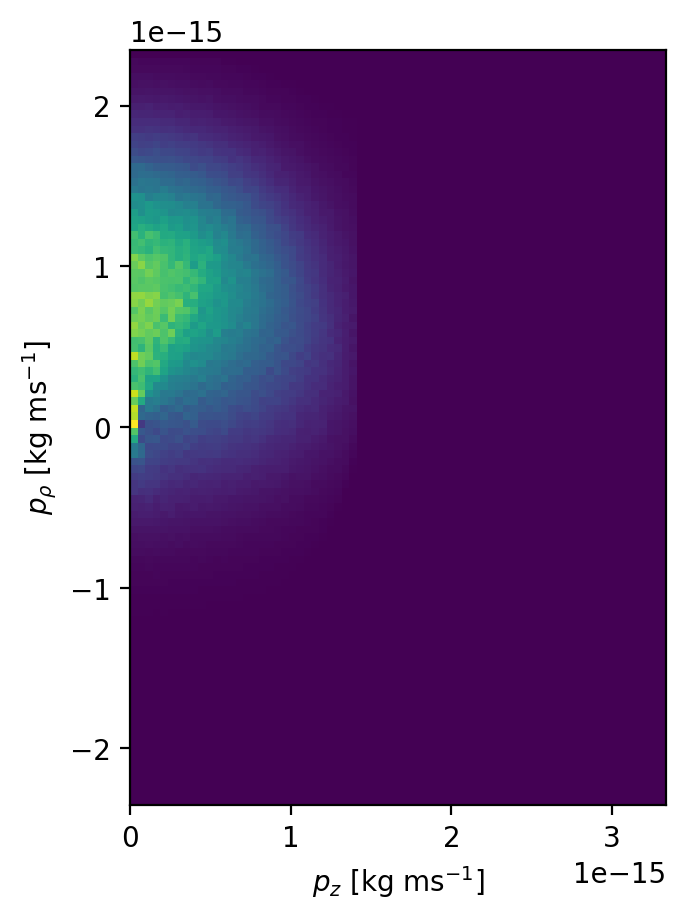

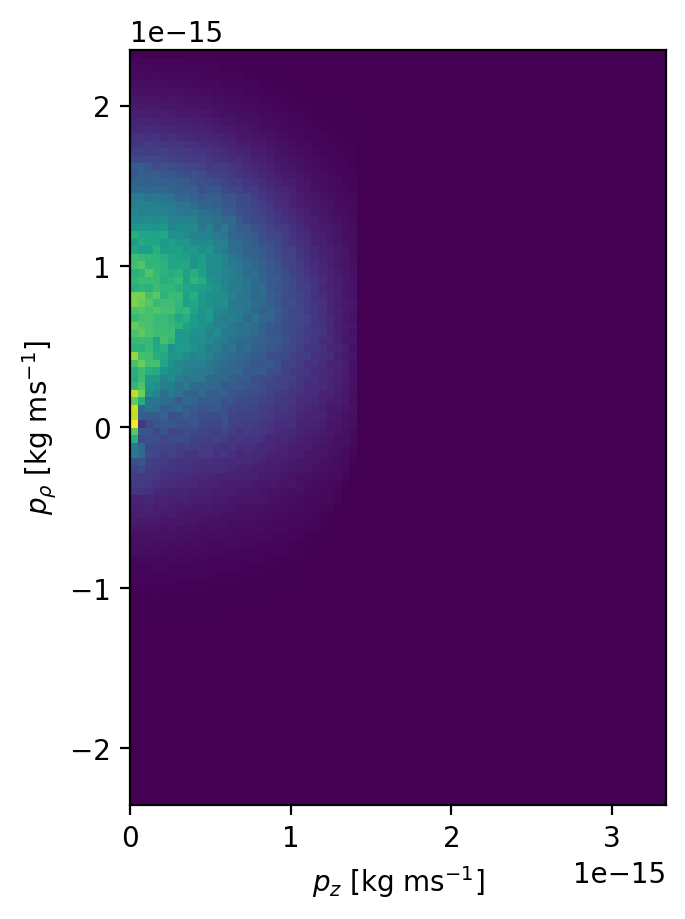

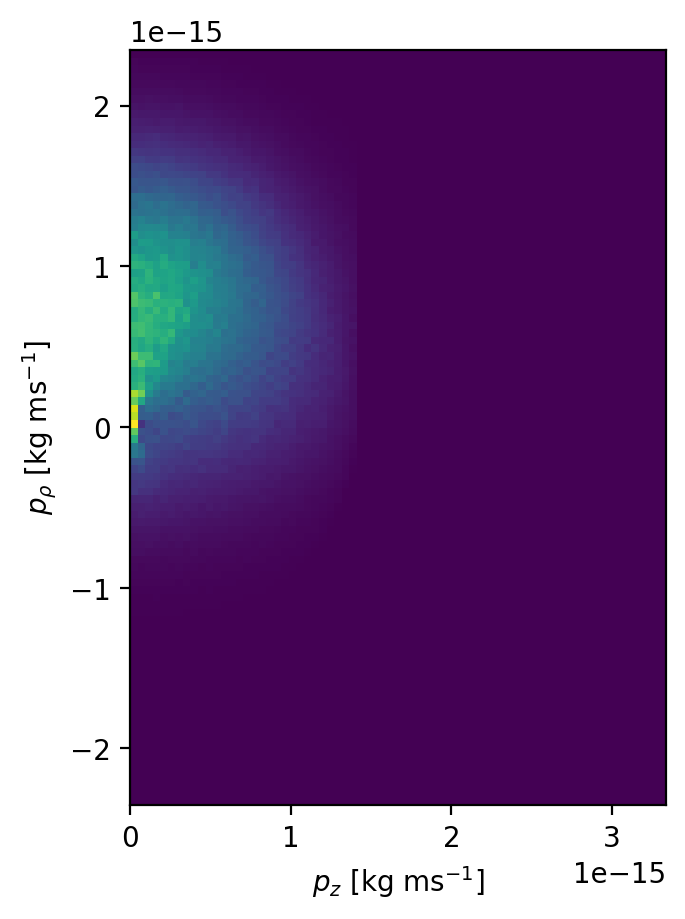

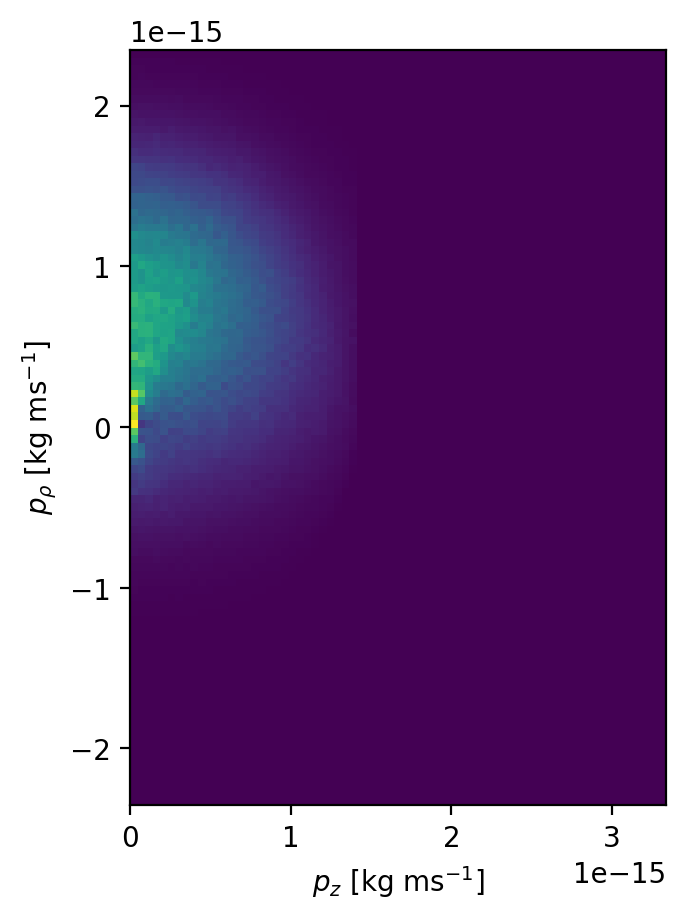

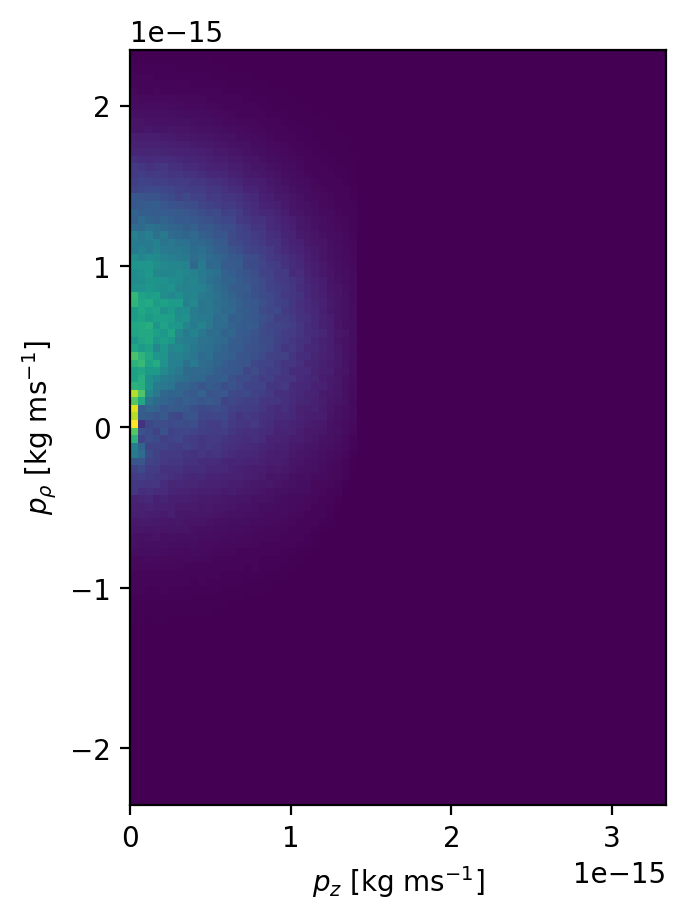

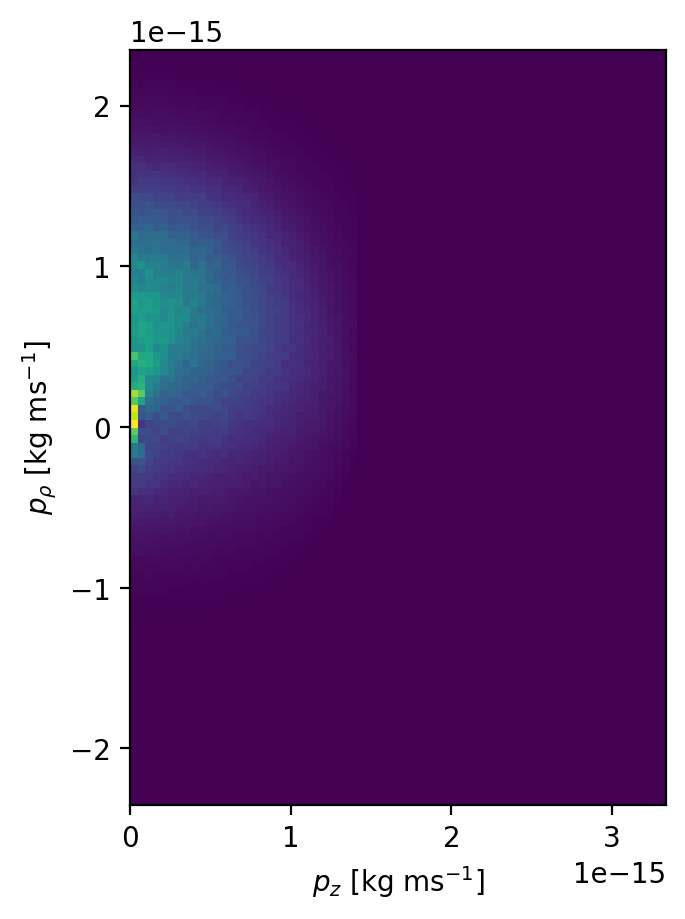

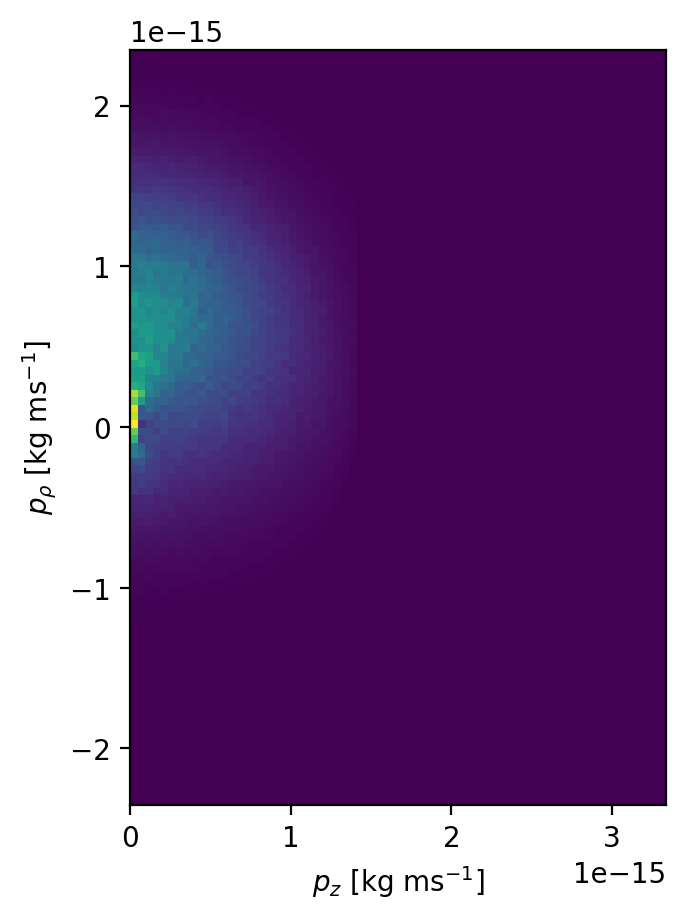

In [664]:
plt.figure(figsize=(5,5),dpi=200)
plt.plot(np.array(times)*1000,np.concatenate([[1],E]),label='energy',color='DarkRed')
plt.plot(np.array(times)*1000,np.concatenate([[1],P]),label='particles',color='DarkBlue')
plt.xlabel("Time [ms]")
plt.ylabel("Fraction remaining")
plt.legend(loc='upper right')
plt.ylim(0,1)
fig = plt.figure(figsize=(5,5),dpi=200)
ax1 = fig.add_subplot(111)

v=215
ax1.plot(np.array(times)*1000,np.concatenate([[1],E/P]),label='T (Boltzmann numerical)',color='DarkGreen')
ax1.plot(np.array(times[:-1])*1000,meanp,label=r'$\langle p_z \rangle$',color='purple')

ax1.set_ylim(0,1)

vars=np.linspace(0,0.002,100)
ax1.set_xlabel("Time [ms]")
ax1.set_ylabel("Relative value")
vars=np.linspace(0,5,1000)
ax1.plot(vars,np.exp(-716*vars*1e-3),'--',label='CDR Estimate (forced MBDE)')
ax1.legend(loc='upper right')

plt.show()
